# TDNEGF code

## Theory 

Here, an algorithm to find the evolution of an electronic lattice system coupled to localized magnetic moments is implemented. [Ref].
The origianl equations of motion reads: 

**Differential equations** 

This method, take advantage of the residue theorem, using an expasion in lorentzian functions for the self energies, and an Ozaki or Denis decomposition for the fermi function.
For the Loretzian decomposion, the parameters are found thorugh a fitting with a loretnzian decomposition. For the fermi function, for example for the Ozaki decomposition, the parameters are finded thorugh the usual method of the eigenvalues and eigenvector of an auxiliary matrix [Ref]. In order to understand better the method, lets review the poles decomposition.


Note, that the self energy must be known, we first decompose it in the eingen vectors and after we use the lorentizian decomposition in the following way:

- $\boldsymbol{\Gamma}_\alpha(\varepsilon)=-2 \operatorname{Im} \boldsymbol{\Sigma}_\alpha^r(\varepsilon)$.
- $\boldsymbol{\Gamma}_\alpha(\varepsilon)=\sum_{c=1}^{N_c} \vec{\xi}_{\alpha c}(\varepsilon) v_{\alpha c}(\varepsilon) \vec{\xi}_{\alpha c}^{\dagger}(\varepsilon)$
- $\boldsymbol{\Gamma}_\alpha(\varepsilon)=\sum_{c=1}^{N_c} \sum_{\ell=1}^{N_{\mathrm{L}}} \vec{\xi}_{\alpha c} \frac{\Lambda_{\alpha \ell c} W_{\alpha \ell c}^2}{\left(\varepsilon-\varepsilon_{\alpha \ell c}\right)^2+W_{\alpha \ell c}^2} \vec{\xi}_{\alpha c}^{\dagger}$,


Note that the parameters $parameters$ correspond to the widht and central energy of each one of the modes of the decomposition 

For the fermi function, we use the Ozaki decomposition, getting:

- $f(\varepsilon)=\frac{1}{1+\exp (\varepsilon)} \approx \frac{1}{2}-\sum_{p=1}^{N_{\mathrm{F}}}\left(\frac{R_p}{\varepsilon-z_p^{+}}+\frac{R_p}{\varepsilon-z_p^{-}}\right),$

where $parameters$ corresponds to the eigenvalues and eigen vectors respectivly.

later we will se how to find these poles explicitly. ,
Now repla this decomposition in the original equations of motion they reads:
- $\mathrm{i} \hbar \frac{\mathrm{d}}{\mathrm{d} t} \boldsymbol{\sigma}(t)=\left[\mathbf{H}_{\text {dev. }}(t), \boldsymbol{\sigma}(t)\right]+\mathrm{i} \sum_{\alpha \in\{\mathrm{L}, \mathrm{R}\}}\left(\boldsymbol{\Pi}_\alpha(t)+\boldsymbol{\Pi}_\alpha^{\dagger}(t)\right)$,
- $\begin{aligned} \mathrm{i} \hbar \frac{\mathrm{d}}{\mathrm{d} t} \Omega_{\alpha x c, \alpha^{\prime} x^{\prime} c^{\prime}}(t)= & \left(\chi_{\alpha^{\prime} x^{\prime} c^{\prime}}^{-}(t)+\Delta_{\alpha^{\prime}}(t)-\chi_{\alpha x c}^{+}(t)-\Delta_\alpha(t)\right) \Omega_{\alpha x c, \alpha^{\prime} x^{\prime} c^{\prime}}(t) \\ & +\mathrm{i} \hbar\left(\Lambda_{\alpha^{\prime} x^{\prime} c^{\prime}}^{>-}-\Lambda_{\alpha^{\prime} x^{\prime} c^{\prime}}^{<-}\right) \vec{\xi}_{\alpha^{\prime} c^{\prime}}^{\dagger} \vec{\Psi}_{\alpha x c}(t)+\mathrm{i} \hbar\left(\Lambda_{\alpha x c}^{>,+}-\Lambda_{\alpha x c}^{<,+}\right) \vec{\Psi}_{\alpha^{\prime} x^{\prime} c^{\prime}}^{\dagger}(t) \vec{\xi}_{\alpha c},\end{aligned}$
- $\begin{aligned} \mathrm{i} \hbar \frac{\mathrm{d}}{\mathrm{d} t} \vec{\Psi}_{\alpha x c}(t)=[ & {\left[\mathbf{H}_{\mathrm{dev} .}(t)-\left(\chi_{\alpha x c}^{+}+\Delta_\alpha(t)\right) 1\right] \vec{\Psi}_{\alpha x c}(t)+\hbar \Lambda_{\alpha x c}^{<,+} \vec{\xi}_{\alpha c} } \\ & +\hbar\left(\Lambda_{\alpha x c}^{>,+}-\Lambda_{\alpha x c}^{<,+}\right) \boldsymbol{\sigma}(t) \vec{\xi}_{\alpha c}+\frac{1}{\hbar} \sum_{\alpha^{\prime} x^{\prime} c^{\prime}} \Omega_{\alpha x c, \alpha^{\prime} x^{\prime} c^{\prime}}(t) \vec{\xi}_{\alpha^{\prime} c^{\prime}},\end{aligned}$


Note that

## Parameters and definitions

Note that  most of the quantities corresponds to tensorial elements and then will be denoted using the respective index,
for a general quantitie its dependency will be puted after the name of the variable and an underscore (e.g variable_dependencies),
this will make the code more readable and the dimension of the quantities can be inferred, the notation for the indexes are: 

- $\alpha,\beta \equiv \text{leads indexes ( for 1d, we just have two leads 1 corresponde to the left and 2 to the right)}$
- $k1 \equiv \text{poles of the lorentzian fitting}$
- $k2 \equiv \text{poles of the fermi function (Ozaki or denis decomposition)}$
- $k,p \equiv \text{all the poles in the system}$
- $a1 \equiv \text{index over the lattice space of the central system} $
- $a \equiv \text{index over the full hilbert space of the central system} \ (lattice\otimes spin)$
- $i,j \equiv \text{number of modes of the leads (in 1d it is 2 for the spin degree of freedom)}$
- $m \equiv \text{Index associated to the type of the pole it could be}\ \pm  $
- $x\equiv x1,x2,x3 = \text{x,y,z cartesian indexes}$

### Libraries

In [1]:
### To install the principal packages
using Pkg
Pkg.add("TensorOperations")
Pkg.add("BenchmarkTools")
Pkg.add("LinearAlgebra")
Pkg.add("Plots")
Pkg.add("DifferentialEquations")
Pkg.add("Tullio")
Pkg.add("DelimitedFiles")
Pkg.add("LaTeXStrings")
Pkg.add("StaticArrays")
Pkg.add("Serialization")
Pkg.build("GR_jll")
Pkg.precompile( )

  Installing known registries into `~/.julia`
       Added `General` registry to ~/.julia/registries
    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
   Installed PackageExtensionCompat ─ v1.0.2
   Installed PtrArrays ────────────── v1.3.0
   Installed LRUCache ─────────────── v1.6.2
   Installed TupleTools ───────────── v1.6.0
   Installed VectorInterface ──────── v0.5.0
   Installed StridedViews ─────────── v0.4.1
   Installed Strided ──────────────── v2.3.0
   Installed Preferences ──────────── v1.4.3
   Installed PrecompileTools ──────── v1.2.1
   Installed TensorOperations ─────── v5.2.0
    Updating `~/.julia/environments/v1.10/Project.toml`
  [6aa20fa7] + TensorOperations v5.2.0
    Updating `~/.julia/environments/v1.10/Manifest.toml`
  [8ac3fa9e] + LRUCache v1.6.2
  [65ce6f38] + PackageExtensionCompat v1.0.2
⌅ [aea7be01] + PrecompileTools v1.2.1
  [21216c6a] + Preferences v1.4.3
  [43287f4e] + PtrArrays v1.3.0
  [5e0ebb24] + Strided v

In [2]:
### Libraries
#using TensorOperations      ### Library to work with tensors
using BenchmarkTools
using LinearAlgebra          ### Linear algebra library
using Plots                  ### Library to make plots
using DifferentialEquations  ### Library to use differential equations
using Tullio                 ### Library to work with tensors
using Base.Threads           ### Function to check the number of threads 
using DelimitedFiles         ### Manipulate files 
using LaTeXStrings           ### Latex strings
using StaticArrays
using Serialization
n_threads = Threads.nthreads() ##= 4
println("Number of threads used in operations is : " , n_threads )
# Threads.@threads for i in 1:10
#     println(Threads.threadid())
# end

Number of threads used in operations is : 1


### Basic Matrices

In [3]:
### Elementary matrices
#σ_0 = SMatrix{ComplexF64}([1 0; 0 1])
σ_0 = SMatrix{2,2,ComplexF64}([1. 0. ; 0 1]) 
σ_x =  SMatrix{2,2,ComplexF64}([0 1; 1 0]) 
σ_y =  SMatrix{2,2,ComplexF64}([0 -im ; im 0 ])
σ_z = SMatrix{2,2,ComplexF64}([1 0. ; 0. -1])
### Elementaty constants
const MBOHR = 5.788381e-5         ### Bohrs magneton eV·T−1
const KB = 8.6173324e-5           ### Bolzmann factor
const GAMMA_R = 1.760859644e-4    ### Gyromagnetic ratio ##1 for units of G_r=1 rad T^(-1) fs^(-1) of electron
const hbar = 0.658211928e0 # (eV*fs)
#0.6582119569
const k_Boltzmann = 0.00008617343 ;#(eV/K) # 1.3806504d-23 (J/K)

### Global parameters

In [4]:
### Global parameters 
const n = 3                              ### number of sites
const n_lorentz = 31                     ### number of  lorentzians 
const n_channels = 2                     ### number of channels(2 for full spin)
const delta_tdep_L,delta_tdep_R  = 0,0
const E_F_system, V_bias = 0., 0.        ### Fermi energy andd Vbias
const E_F_left = E_F_system + 0.5*V_bias
const E_F_right = E_F_system - 0.5*V_bias
const alpha_r = 0.0                      ### Rashba parameter 
const theta_1, phi_1 = 45.0, 0.0         ### Angles of sub lattice 1
const theta_2, phi_2 = 12.9, 0.0         ### Angles of sub lattice 2
##angles sublattice 1
##angles sublattice 2
const period = 0                         ### Period of precession 
const N_rash = 0                         ### number of magnetic moment with rashba from 0 to Nrash 
const Temp, N_poles = 300., 30           ### Temp, Npoles of the fermi function 
const t_0, t_step, t_end = 0,0.1,100      ### time to start step and end
##light flag 
const J_sd = 0.0                         ### jsd_to_llg from classical spin to H_el
const n_precessing = 1                  ### number of spins precessing 
##domain walll width 
#t_long time before start llg 
#t_bias time before start vbias 
#llg_step Num of TDNEGF steps between LLG 
const J_qsl = 0.0
#---------- Parameters in the llg equations----------#
const n_sites = n                        ### number of LLG sites (equal to -1)
const nt = 1                             ### number of time steps in llg 
const dt = 0.1                           ### time interval of a single LLG step 
const h0 = Float64[0., 0., 0.]           ### external magnetic field vector
const j_exc = 0.0                        ### jexc coupling between classical spins
const g_lambda = 0.0                     ### gilbert damping factor
const j_sd = 0.1                         ### jsd in the llg equation
const j_dmi = 0.0                        ### Dyaloshinski-Moriya
const j_ani = 0.0                        ### Magnetic anisotropy
const j_dem = 0.0                        ### Demagnetization field 
const e = Float64[0., 0., 0.]            ### Direction of magnetic anisotropy
const e_demag = Float64[0., 0., 0.]      ### Direction of demagnetization vector
const js_pol = 0.0                       ### Jsd coupling of the polarizer
const js_ana = 0.0                       ### Jsd_coupling of the analyzer
const thop = 1.0                         ### Hopping in the central part
const p_theta = 0.0                      ### polarizer vector theta
const p_phi = 0.0                        ### polarizer vector phi
#run_llg
#--------------Save and replay--------------------------------#
const curr,scurr = true, true            ### save currents 
const rho, sden = true,true              ### save densities
const solver = "denis"
const cspin_orientation = "sym_pump"#"polarizer"#"arb_dir" ;    ### Configuration of the classical spins
const read_bias_file  =  false
const bias_file  =  "./vtd.txt" ;
const name = "test"

"test"

In [7]:
### external parameters for the lorentzian decomposition
#data for 31 lorentzians 
data_fit_pdbest = readdlm( "./selfenergy/selfenergy_1DTB_NNLS_31_pbest.csv" , ',', Float64)
data_fit_Ulsq = readdlm( "./selfenergy/selfenergy_1DTB_NNLS_31_Ulsq.csv", ',', Float64) ;

ArgumentError: ArgumentError: Cannot open './selfenergy/selfenergy_1DTB_NNLS_31_pbest.csv': not a file

In [ ]:
### dependent_parametes
#Here all the parameters that depends on global_parameters are iniliallized
#are initiallized
I_a1b1 = Matrix{ComplexF64}(I, n, n)                                       ### One in the Hilbert space of the lattice sites
I_ab = Matrix{ComplexF64}(I,
       n_channels*n, n_channels*n)                                         ### One in the Hilbert of lattice ⊗ spin
σ_x1ab = kron(I_a1b1,  σ_x)                                                ### Pauli Matrices in the Hilbert space of the lattices 
σ_x2ab = kron(I_a1b1,  σ_y) 
σ_x3ab = kron(I_a1b1,  σ_z) 
σ_abx = cat(σ_x1ab,σ_x2ab
        , σ_x3ab, dims= (3) )                                              ### Tensor with all the pauli Matrices
### ----- fiting parameters of the lorentzian functions ---- ###
eps_L = copy(data_fit_pdbest[1:2:end])                                           ### Resonant level
eps_R = copy(eps_L)
w0_L  = abs.(data_fit_pdbest[2:2:end])                                      ### Level witdth
w0_R  = copy(w0_L)
const w0_k1α = cat(w0_L,w0_R,dims=2)                                        ### Tensor definition of the fitting parameters
const eps_k1α = cat(eps_L,eps_R,dims=2)
gam_L = zeros(Float64, n_lorentz,n_channels)                                ### Gamma function
gam_R = zeros(Float64,n_lorentz,n_channels)
gam_L[:,1] = data_fit_Ulsq
gam_L[:,2] = data_fit_Ulsq
gam_R = copy(gam_L)
const gam_k1iα = cat(gam_L,gam_R,dims=3)                                    ### Tensor definition of the gamma function 
#ν_αmik2 = zeros(ComplexF64,2,2,2,N_poles)
### ----- Oaki parameters ---- ###
const k_poles = N_poles + n_lorentz                                         ### total number of poles
R_alpha_L = zeros(2*N_poles)                                                ### Matrix used to calculate the poles properties  
R_alpha_R = zeros(2*N_poles)
#R_k2α = zeros(N_poles,2)
const energy_llg = 0.5*(E_F_left + E_F_right)
### ----- Lead parameters ---- ###
csi_L = zeros(ComplexF64,n_channels*n, n_channels, k_poles  )
csi_R = zeros(ComplexF64,n_channels*n, n_channels, k_poles  )
#csi_aikα = cat(csi_L, csi_R, dims = 4)
const E_F_α = Float64[E_F_left, E_F_right]
const beta = 1/(k_Boltzmann*Temp )
if read_bias_file                                                              ### Time dependent pulse in the lead
    ### In this case the delta_\alpha must join as a parameter of the hamiltonian 
    const data_bias = readdlm(bias_file, ' ', Float64 )
#    const ti_bias = size(data_bias)[1]#100                                                       ### steps to turn off the bias 
else
    const delta_α = [0., 0.]#[delta_tdep_L,delta_tdep_R]  
end
# hi_αmk = zeros(ComplexF64, 2, 2,
#         k_poles )                                                          ### χ Value that contain the poles of the lorentzians and fermi function
# hi_αmk1 = zeros(ComplexF64, 2, 2,
#         n_lorentz )   
# hi_αmk2 = zeros(ComplexF64, 2, 2,
#         N_poles ) 
# fermi_m_αmk1 = zeros(ComplexF64,2,
#     2,n_lorentz)
# fermi_p_αmk1 = zeros(ComplexF64,2,2
#     ,n_lorentz)
# Gam_greater_αmik1 =  zeros(ComplexF64,2, 2,n_channels, n_lorentz )       ### Gamma Matrix initiallizations
# Gam_greater_αmik2 = zeros(ComplexF64,2, 2,n_channels, N_poles )
# Gam_greater_αmk = zeros(ComplexF64,2, 2,n_channels, k_poles )
# Gam_lesser_αmik1 =  zeros(ComplexF64,2, 2,n_channels, n_lorentz )
# Gam_lesser_αmik2 = zeros(ComplexF64,2, 2,n_channels, N_poles )
# Gam_lesser_αmik = zeros(ComplexF64,2, 2,n_channels, k_poles )
# Gam_greater_αmik = zeros(ComplexF64,2, 2,n_channels, k_poles )
### ----- variables involved in the dynamics ---- ###
# Omega_αβipjk = zeros(ComplexF64,2,2,n_channels,k_poles,n_channels,k_poles)
# dOmega_αβipjk = zeros(ComplexF64,2,2,n_channels,k_poles,n_channels,k_poles)
# Omega_αikβjp = zeros(ComplexF64,2,n_channels,k_poles,2 ,n_channels,k_poles)
# Omega_αik1βjp1 = zeros(ComplexF64,2,n_channels,n_lorentz,2 ,n_channels,n_lorentz)
# Omega_αik1βjp2 = zeros(ComplexF64,2,n_channels,n_lorentz,2 ,n_channels,N_poles)
# Omega_αik2βjp1= zeros(ComplexF64,2,n_channels,N_poles,2 ,n_channels,n_lorentz)
dOmega_αikβjp = zeros(ComplexF64,2,n_channels,k_poles,2 ,n_channels,k_poles)
dOmega_αik1βjp1 = zeros(ComplexF64,2,n_channels,n_lorentz,2 ,n_channels,n_lorentz)
dOmega_αik1βjp2 = zeros(ComplexF64,2,n_channels,n_lorentz,2 ,n_channels,N_poles)
dOmega_αik2βjp1= zeros(ComplexF64,2,n_channels,N_poles,2 ,n_channels,n_lorentz)
summ1_aik1α = zeros(ComplexF64,2*n,2,n_lorentz,2)
summ2_aik1α = zeros(ComplexF64,2*n,2,n_lorentz,2)
summ3_aik2α = zeros(ComplexF64,2*n,2,N_poles,2)
# psi_aikα = zeros(ComplexF64, 2*n, n_channels, k_poles, 2 )
dpsi_aikα = zeros(ComplexF64, 2*n, n_channels, k_poles, 2 )
# rho_ab = zeros(ComplexF64, 2*n, 2*n )
drho_ab = zeros(ComplexF64, 2*n, 2*n )
#Pi_abα = zeros(ComplexF64, 2*n, 2*n, 2 ) 
const dims_Omega1 = (2,n_channels,n_lorentz,2 ,n_channels,n_lorentz)
const dims_Omega2 = (2,n_channels,n_lorentz,2 ,n_channels,N_poles)
const dims_Omega3 = (2,n_channels,N_poles,2 ,n_channels,n_lorentz)
# size_Omega = prod(dims_Omega)
const size_Omega1 = prod(dims_Omega1)
const size_Omega2 = prod(dims_Omega2)
const size_Omega3 = prod(dims_Omega3)
const dims_psi = (2*n, 2, k_poles, 2)
const size_psi = prod(dims_psi)
const dims_rho = (2*n, 2*n)
const size_rho = prod(dims_rho)
js_sd_to_el = zeros(Float64, n) ;
const size_rkvec = size_Omega1+size_Omega2+size_Omega3+size_psi+size_rho 
#vec(Omega_αik1βjp1),vec(Omega_αik1βjp2),vec(Omega_αik2βjp1), vec(psi_aikα), vec(rho_ab)
#rkvec = zeros(ComplexF64, size_rkvec)#to_vector(dOmega_αβipjk, dpsi_aikα, drho_ab )
const params = Dict("curr"=>curr, "scurr"=>scurr, "sden"=>sden, "rho"=>rho);    ### Observables calculated at each time step
# sden_xa1 = zeros(Float64, 3, n);                                              ### spin density
# curr_α = zeros(ComplexF64,2)
# scurr_xα = zeros(ComplexF64, 3,2)
# sden_xab = zeros(ComplexF64, 3,2*n,2*n) ;
### -----  external variables involved in the dynamic ---- ###


UndefVarError: UndefVarError: `data_fit_pdbest` not defined

In [ ]:
#zeros((n,n))[1,1]

## Electron-bath dynamics 

### Hamiltonian of the central system

In [ ]:
function create_H(vm_a1x, m_qsl = nothing )
    """ This function creates the Hamiltonian of the central system 
    Note that in general vm_a1x depends on the specific time, and corresponds
    to the classical spin density 
    """
    tso1=0.0
    tso2=0.0
    hops_tso1 = zeros(ComplexF64,(n,n))
    hops_tso1[1,2] = -tso1*im
    hops_tso1[2,1] =  tso1*im
    hops_tso2 = zeros(ComplexF64,(n,n))
    #hops_tso2[6,7] = -tso2*im
    #hops_tso2[7,6] =  tso2*im
    #### For the moment we will only have quadratic hamiltonians 
    # Hopping hamiltonian
    hops = -thop.*ones(n-1) 
    H = diagm(-1 =>  hops) .+ diagm(1 =>  hops)
    # Include the spin degree of freedom 
    H = kron(H,σ_0) + kron(hops_tso1 + hops_tso2, σ_y)
    m_a1x = hcat(vm_a1x...)#[:, :]
    # if we want to include the j_sd depending on the sites, we just must take the dot product 
    #println(m_a1x[1,:])
    m_x = diagm(m_a1x[1,:]) # x component in a matrix form 
    m_y = diagm(m_a1x[2,:]) # y component in a matrix form
    m_z = diagm(m_a1x[3,:]) # z component in a matrix form
    #println(m_x)
    H += -J_sd.*( kron(m_x, σ_x ) .+
                kron(m_y, σ_y ) .+
                kron(m_z, σ_z ) )
    ### This is applied when the system is coupled to the spin liquid
    if m_qsl != nothing
            m_qsl_a1x = hcat(m_qsl...)
            m_qsl_x = diagm(m_qsl_a1x[1,:]) # x component in a matrix form 
            m_qsl_y = diagm(m_qsl_a1x[2,:]) # y component in a matrix form
            m_qsl_z = diagm(m_qsl_a1x[3,:]) # z component in a matrix form
            H += -J_qsl.*( kron(m_qsl_x, σ_x ) .+
            kron(m_qsl_y, σ_y ) .+
            kron(m_qsl_z, σ_z ) )
    end
        
    return H
end
# vm_qsl_a1x= [[1,0,0], [1,0,0,], [1,0,0]]
# vm_a1x= [[1,0,0], [1,0,0,], [1,0,0]]
#create_H(vm_a1x,vm_qsl_a1x)

create_H (generic function with 2 methods)

### Green function and self energy

In [ ]:
### Green funuction of the leads
function selfenergy(energy, thop = thop, t_ls = 1.) 
    """ This function computes the exact self energy 
    for a 1d chain of electrons 
    
    parameters:
    ----------
    energy: Float64
    energy of the system 
    thop: complex-Float64
    hopping parameter
    t_ls: complex Float-64
    hopping parameter that determines if the system is connected or not
    
    returns:
    -------
    selfenergy: ComplexF64
    Value of the self-energy 
    """
    rad = 4 * thop^2 - energy^2
    if real(rad) > 0
        selfenergy = energy - im * sqrt(rad)
    else
        if real(energy) > 0
            sgn = 1
        else
            sgn = -1
        end
        selfenergy = energy - sgn * sqrt(-rad)
    end
    selfenergy = selfenergy * (thop^2 / (2 * t_ls^2))
    return selfenergy
end

function green(vm_a1x,energy,t=1.0,jsd=1.0 ) 
    """ This function computes the Green function of the central system
    parameters:
    ----------
    energy: float64
    energy of the system 

    External parameters:
    -------------------
    n: Int64
    number of lattice sites
    n_channels: Int64
    number of channels(2 if spin)
    H: Matrix of ComplexFloat64 numbers of size n_channels^2*n^2
    
    returns:
    --------
    green: Matrix with the size of the system 
    n_channels^2*n^2
    """
    H = create_H(vm_a1x)   ## Hamiltonian it comes from global_parameters
    se = selfenergy(energy)  ## Self energy of the system
    #Addition of the self energy (Note that it is added just in the first and last site)
    H[1:2,1:2] = H[1:2,1:2] .+ se.*σ_0 #I(2)
    H[2*n-1:2*n,2*n-1:2*n] = H[2*n-1:2*n,2*n-1:2*n] .+ se.*σ_0
    green = inv(energy.*I_ab .- H ) # Green function inverting the system 
    return green
end

green (generic function with 3 methods)



### Osaki poles and residues


In [ ]:
function get_poles(local_dim = n_channels*N_poles)
    """This function calculates the poles and residues of the Ozaki decomposotion of 
    the fermi energy(Note that there are not difference between right and left poles)
    """
    #:qlocal_dim = n_channels*N_poles + 1
    #Mat = zeros(local_dim,local_dim)
    diag = [1/(2*sqrt(4*x^2-1)) for x in 1:local_dim-1 ]
    ### necesary matrix to compute the Osaki poles and residues 
    Mat = diagm(-1 => diag) + diagm(1 => diag)
    ### engein values of the function 
    Eig_vals, Mat = eigen(Mat)
    ### residues 
    Res = Mat[1,:].^2 ./ (4 .*Eig_vals.^2)
    ### filtering the positive values (only the upper poles in the complex plane are needed)
    Eig_vals_p = [] # positive eigenvalues
    Res_p = []
    for i in 1:local_dim
        if Eig_vals[i]>0.
            #println(Eig_vals[i],"  " ,i )
            push!(Eig_vals_p, Eig_vals[i])
            push!(Res_p, Res[i])
        end
    end
    return Eig_vals_p, Res_p
end

get_poles (generic function with 2 methods)

### Variables of the electron-bath system

Here, the dynamical variables will be computed and evaluated. because we are using the residue theorem to reduce the equation of motion, different quantities must be evaluated 
in the poles of the fermi function ($n_{poles}$) and the poles of the lorentzian functions ($n_{lorentz}$). The computed variables correspond to $\Gamma, \Omega, \chi, \zeta, \psi, \rho$. 
All the quantities are defined with tensorial notation, in the following sense:

\begin{align*}
\Gamma^{>/ <} \equiv\Gamma^{>/ <}_{\alpha,m,jk}  &= \Bigg \{-\frac{i}{2} \Lambda_{\alpha,k} W_{\alpha,k}f_{\alpha}(-h_{\alpha,m,k})  , \qquad  \frac{m}{\beta}\nu(\chi_{\alpha,m,k},\epsilon_{\alpha,l},W_{\alpha,k})\Lambda_{\alpha,j,l} R_{\alpha,k} \Bigg \}
\end{align*}



In [ ]:
function fermi(energy,beta = beta)
    """ This function evaluate the fermi energy at the temperature defined in the global 
    parameters
    """
   fermi = 1. / (1. + exp(beta*energy  ) )
end
function spectraldensity(en, epsil,wid )
    """ Computes a lorentzian distribution 
    (Here Usually the resonance and the width are fitted previously )
    args:
    ----
    en : Float64
    variable of energy where the distribution is evaluated
    epsil:Float64
    center of the lorentzian 
    wid: Float64
    width of the lorentzian 

    returns:
    -------
    lorentz: Float64
    Lorentzian distribution evaluated in energy en
    """
    lorentz = wid^2/((en-epsil)^2 + wid^2 )
    return lorentz
end

function create_hi(;eps_k1α = eps_k1α , w0_k1α = w0_k1α, E_F_α = E_F_α, Eig_vals_k2α = Eig_vals_k2α)
    """ This function creates the variable χ_{α,m,k}. This quantitie is related with the poles of the lorentzia
    paramaters:
    -------------------
    Note that the parameters are related with the evaluation of the poles 
    The first 2 parameters correspons to the elements associated with the resonance and the width of the 
    lorentzian function, the third element contain the fermi energy of the leads and the fourth element 
    contain the poles of the ozaki function 
    """
    hi_αmk = zeros(ComplexF64, 2, 2, k_poles ) 
    @tullio hi_αmk1[α, m ,k1 ] := eps_k1α[k1,α] + (-1)^m*w0_k1α[k1,α]*1im  (m in 1:2)
    @tullio hi_αmk2[α, m ,k2 ] := E_F_α[α] + (-1)^m * 1im/(Eig_vals_k2α[k2,α]*beta)  (m in 1:2)
    hi_αmk[:, :, 1:n_lorentz] .= hi_αmk1
    hi_αmk[:,:,n_lorentz+1:k_poles] .= hi_αmk2

    return hi_αmk,hi_αmk1,hi_αmk2
end

function create_Gam(;hi_αmk=hi_αmk,hi_αmk1=hi_αmk1,hi_αmk2=hi_αmk2,E_F_α = E_F_α, R_k2α= R_k2α,gam_k1iα=gam_k1iα,w0_k1α=w0_k1α)
    """ This function evaluates the Gamma function using the residue theorem for the 
    lorentzian and fermi poles(Ozaki decomposition) using the tullio
    library. Also is important to note that all the elements are evaluated using tensorial notation
    """
    Gam_lesser_αmik = zeros(ComplexF64,2, 2,n_channels, k_poles )
    Gam_greater_αmik = zeros(ComplexF64,2, 2,n_channels, k_poles )
    
    ### Fermi function 
    @tullio fermi_m_αmk1[α,m,k1] := fermi(-hi_αmk1[α,m,k1] + E_F_α[α] )
    @tullio fermi_p_αmk1[α,m,k1] := fermi(hi_αmk1[α,m,k1] - E_F_α[α]  )
    ### Quantity related with the spectral density 
    @tullio ν_αmik2[α,m,j,k2] := spectraldensity(hi_αmk2[α,m,k2],eps_k1α[l1,α],w0_k1α[l1,α] )*gam_k1iα[l1,j,α]
    ### Definition of Gamma greater for the poles of the fermi function and the lorentzian poles 
    @tullio Gam_greater_αmik1[α, m,i, k1 ] := -0.5im*gam_k1iα[k1,i,α]*w0_k1α[k1,α]*fermi_m_αmk1[α,m,k1] # Fermi function poles
    @tullio Gam_greater_αmik2[α, m,i, k2 ] := (-1)^(m)*ν_αmik2[α,m,i,k2]*R_k2α[k2,α]/beta # Lorentzian poles 
    Gam_greater_αmik[:,:,:,1:n_lorentz] = Gam_greater_αmik1
    Gam_greater_αmik[:,:,:,n_lorentz+1:k_poles] = Gam_greater_αmik2
    ### Definition of Gamma lesser for the poles of the fermi function and the lorentzian poles
    @tullio Gam_lesser_αmik1[α, m,i, k1 ] := 0.5im*gam_k1iα[k1,i,α]*w0_k1α[k1,α]*fermi_p_αmk1[α,m,k1]
    #@tullio Gam_lesser_αmik2[α, m,i, k2 ] = (-1)^(m)*ν_αmik2[α,m,i,k2]*R_k2α[k2,α]/beta
    #Gam_lesser_αmik2 = copy(Gam_greater_αmik2 )
    Gam_lesser_αmik[:,:,:,1:n_lorentz] .= Gam_lesser_αmik1
    Gam_lesser_αmik[:,:,:,n_lorentz+1:k_poles] .= Gam_greater_αmik2 # Gam_lesser_αmik2 they are equal
    return Gam_greater_αmik, Gam_lesser_αmik 
end
function create_csi(;csi_L=csi_L,csi_R=csi_R)
    """ This function creates the csi eigen vector ζ that corresponds to the 
    eigen vector of the Gamma functions, note that it will be stored in tensorial
    notation
    
    returns:
    --------
    csi_aikα
    """
    csi_aikα = zeros(Float64, n*2,2,k_poles,2 )#cat(csi_L, csi_R, dims = 4)
    csi_L[1,1,:] = csi_L[2,2,:] = csi_R[2*n-1,1,:] = csi_R[2*n,2,:] .= 1.
    csi_aikα .= cat(csi_L, csi_R, dims = 4)
    #nothing
    return csi_aikα #csi_L, csi_R
end


create_csi (generic function with 1 method)

### Equations of motion 


In [ ]:
function to_matrix(vector)
    """ This function transform a vector into a tensor 
    """
    @views Omega_αik1βjp1 = reshape(vector[1:size_Omega1], dims_Omega1 )
    #Omega_αik1βjp1 = reshape( Omega_αik1βjp1, dims_Omega1 )
    @views Omega_αik1βjp2 = reshape(vector[size_Omega1+1:size_Omega1+ size_Omega2],dims_Omega2)
    #Omega_αik1βjp2 = reshape( Omega_αik1βjp2, dims_Omega2 )
    @views Omega_αik2βjp1 = reshape(vector[size_Omega1+size_Omega2+1 : size_Omega1+size_Omega2+size_Omega3],dims_Omega3)
    #Omega_αik2βjp1 = reshape( Omega_αik2βjp1, dims_Omega3 )
    @views psi_aikα = reshape(vector[size_Omega1+ size_Omega2+size_Omega3+1 : size_Omega1+ size_Omega2+size_Omega3+ size_psi ],
                        dims_psi)
    #psi_aikα = reshape(psi_aikα, dims_psi )
    @views rho_ab = reshape(vector[size_Omega1+ size_Omega2+size_Omega3+ size_psi+ 1 : size_Omega1+ 
            size_Omega2+size_Omega3+ size_psi+ size_rho ], dims_rho)

    return  Omega_αik1βjp1,Omega_αik1βjp2,Omega_αik2βjp1, psi_aikα, rho_ab
end

function to_vector(dOmega_αik1βjp1,dOmega_αik1βjp2,dOmega_αik2βjp1, dpsi_aikα, drho_ab )
    """ This function transforms the Omega,rho and psi in a vector in order to solve the differential 
    equation using rk4 or other merhod 
    args:
    -----
    This function must already know the quantities 
    Omega,rho and psi
    return:
    -------
    d_vector: n dimensional array 
    this vector contains all the quantities in a vector 
    in order to solve the differential equation
    """
    dvector = vcat(vec(dOmega_αik1βjp1),vec(dOmega_αik1βjp2),vec(dOmega_αik2βjp1), vec(dpsi_aikα), vec(drho_ab) ) 
    return dvector 
end 

function eom!(du, u, p, t)
    """ This function creates the differential equation that must be solved 
    it must be putted in a vectorial form 
    args:
    ----
    du: represents the derivate of the vector 
    u: reprenset the component of the vector to be solved
    returns:
    -------
    it defines qthe differential equation 
    in this case the variable du is modified 
    to deffine the differential equation
    """
    
     #### will be better Preallocate them? need to be checked
#     dOmega_αikβjp = zeros(ComplexF64,2,n_channels,k_poles,2 ,n_channels,k_poles)
#     dOmega_αik1βjp1 = zeros(ComplexF64,2,n_channels,n_lorentz,2 ,n_channels,n_lorentz)
#     dOmega_αik1βjp2 = zeros(ComplexF64,2,n_channels,n_lorentz,2 ,n_channels,N_poles)
#     dOmega_αik2βjp1= zeros(ComplexF64,2,n_channels,N_poles,2 ,n_channels,n_lorentz)
#     summ1_aik1α = zeros(ComplexF64,2*n,2,n_lorentz,2)
#     summ2_aik1α = zeros(ComplexF64,2*n,2,n_lorentz,2)
#     summ3_aik2α = zeros(ComplexF64,2*n,2,N_poles,2)
#     dpsi_aikα = zeros(ComplexF64, 2*n, n_channels, k_poles, 2 )
#     drho_ab = zeros(ComplexF64, 2*n, 2*n )

    H_ab::Array{ComplexF64} = p[1]
    delta_α::Vector{Float64} = p[2]
    
    Pi_abα = zeros(ComplexF64, 2*n, 2*n, 2 )
    ## Preallocation of the variables to be used 
    Omega_αik1βjp1 = Array{ComplexF64}(undef,dims_Omega1)
    Omega_αik1βjp2 = Array{ComplexF64}(undef,dims_Omega2)#zeros(ComplexF64,2,n_channels,n_lorentz,2 ,n_channels,N_poles)
    Omega_αik2βjp1= Array{ComplexF64}(undef,dims_Omega3)#zeros(ComplexF64,2,n_channels,N_poles,2 ,n_channels,n_lorentz)
    psi_aikα = Array{ComplexF64}(undef,dims_psi)#zeros(ComplexF64, 2*n, n_channels, k_poles, 2 )
    rho_ab = Array{ComplexF64}(undef,dims_rho)

    Omega_αik1βjp1,Omega_αik1βjp2,Omega_αik2βjp1, psi_aikα, rho_ab = to_matrix(u)
    ### Notice that i take out the conjugate
    @tullio threads=true   dOmega_αik1βjp1[α,i,k1+0,β,j,p1+0] = begin 
    (   conj( csi_aikα[a,j,p1,β])*psi_aikα[a,i,k1,α]*(Gam_greater_αmik[β,1,j,p1] 
                - Gam_lesser_αmik[β,1,j,p1]) )
    end
    @tullio dOmega_αik1βjp1[α,i,k1+0,β,j,p1+0] += conj(psi_aikα[a,j,p1,β])*csi_aikα[a,i,k1,α]*(Gam_greater_αmik[α,2,i,k1] 
                                                - Gam_lesser_αmik[α,2,i,k1] ) 
    
    @tullio dOmega_αik1βjp1[α,i,k1+0,β,j,p1+0] +=-1im/$hbar*(hi_αmk[β,1,p1] + delta_α[β]
                                          -(hi_αmk[α,2,k1] + delta_α[α]) )*Omega_αik1βjp1[α,i,k1,β,j,p1]
    
    du[1:size_Omega1] .= vec(dOmega_αik1βjp1)
    
    @tullio  dOmega_αik1βjp2[α,i,k1+0,β,j,p2] = begin 
    (    conj(csi_aikα[a,j,$n_lorentz + p2 ,β])*psi_aikα[a,i,k1,α]*(Gam_greater_αmik[β,1,j,$n_lorentz + p2] 
                - Gam_lesser_αmik[β,1,j,$n_lorentz  + p2])  )
    end
    
    @tullio dOmega_αik1βjp2[α,i,k1+0,β,j,p2] += conj( psi_aikα[a,j,$n_lorentz + p2,β])*csi_aikα[a,i,k1,α]*(Gam_greater_αmik[α,2,i,k1] 
                                            - Gam_lesser_αmik[α,2,i,k1] )
    @tullio dOmega_αik1βjp2[α,i,k1+0,β,j,p2] +=  -1im/$hbar*(hi_αmk[β,1,$n_lorentz+ p2] 
                                + delta_α[β] - ( hi_αmk[α,2,k1] + delta_α[α]  ) )*Omega_αik1βjp2[α,i,k1,β,j, p2]
    
    du[size_Omega1 + 1 : size_Omega1 + size_Omega2 ] .= vec(dOmega_αik1βjp2)

    @tullio  dOmega_αik2βjp1[α,i,k2+0,β,j,p1+0] = begin 
    (   conj(csi_aikα[a,j,p1,β])*psi_aikα[a,i,$n_lorentz + k2,α]*(Gam_greater_αmik[β,1,j,p1] - Gam_lesser_αmik[β,1,j,p1])   )
    end
    @tullio dOmega_αik2βjp1[α,i,k2+0,β,j,p1+0] += conj(psi_aikα[a,j,p1,β])*csi_aikα[a,i,$n_lorentz + k2,α]*(Gam_greater_αmik[α,2,i,$n_lorentz  + k2] 
                                    - Gam_lesser_αmik[α,2,i,$n_lorentz  + k2] )
    @tullio dOmega_αik2βjp1[α,i,k2+0,β,j,p1+0] += -1im/$hbar*(hi_αmk[β,1,p1] + delta_α[β] 
                                - ( hi_αmk[α,2,$n_lorentz+k2] + delta_α[α]  ) )*Omega_αik2βjp1[α,i,k2,β,j,p1] 
    
    du[size_Omega1 + size_Omega2 + 1 : size_Omega1 + size_Omega2 + size_Omega3] .= vec(dOmega_αik2βjp1)

    @tullio summ1_aik1α[a,i,k1,α] = begin
         Omega_αik1βjp1[α,i,k1,β,j,p1 + 0]*csi_aikα[a,j,p1+0,β]
    end
    ###### This summ2 is defined differently in the Fortran code (IT must be checked) 
    @tullio summ2_aik1α[a,i,k1,α] = begin
         Omega_αik1βjp2[α,i,k1,β,j,p2+0]*csi_aikα[a,j,$n_lorentz+p2 ,β] #$n_lorentz + p2 in csi ### need to be checked
    end
    ######
    @tullio summ3_aik2α[a,i,k2,α] = begin
         Omega_αik2βjp1[α,i,k2,β,j,p1+0]*csi_aikα[a,j,p1,β]
    end
    #### in this case the sum must be splitted due to the sum over index i
    @tullio dpsi_aikα[a,i,k,α] = -1im*Gam_lesser_αmik[α,2,i,k]*csi_aikα[a,i,k,α] + 1im/$hbar*(hi_αmk[α,2,k]+ delta_α[α])*psi_aikα[a,i,k,α]  ## check
    @tullio  dpsi_aikα[a,i,k,α] += -1im*rho_ab[a,b]*csi_aikα[b,i,k,α]*(Gam_greater_αmik[α,2,i,k] - Gam_lesser_αmik[α,2,i,k]) ##SEMIcheck or not sure by rho
    @tullio  dpsi_aikα[a,i,k,α] += -1im/$hbar*H_ab[a,b]*psi_aikα[b,i,k,α] ### check
    
    @tullio dpsi_aikα[a,i,k1+0,α] += -1im/$hbar^2*(summ1_aik1α[a,i,k1,α] + summ2_aik1α[a,i,k1,α] )  ### SEMIcheck (if rho=0)
    @tullio dpsi_aikα[a,i,k2,α]  += -1im/$hbar^2*summ3_aik2α[a,i,k2-$n_lorentz,α] ### SEMIcheck (if rho=0)
    
    du[size_Omega1 + size_Omega2 + size_Omega3 + 1 : size_Omega1 + size_Omega2 + size_Omega3 + size_psi ] .= vec(dpsi_aikα)

    @tullio Pi_abα[a,b,β] = psi_aikα[a,i,k,β]*conj(csi_aikα[b,i,k,β] )/$hbar
    ### It must be splited in two expression due to the over sum of @tullio
    @tullio drho_ab[a,b] =  -1im/$hbar*(H_ab[a,c]*rho_ab[c,b])
    @tullio drho_ab[a,b] += 1im/$hbar*(rho_ab[a,c]* H_ab[c,b])   #+
    @tullio drho_ab[a,b] += 1/$hbar*(Pi_abα[a,b,β]+ conj(Pi_abα[b,a,β]) )
    du[ size_Omega1 + size_Omega2 + size_Omega3 + size_psi + 1 : size_Omega1 + size_Omega2 + size_Omega3 + size_psi + size_rho ] .= vec(drho_ab)
    #println("elements of PI_L:", Pi_abα[:,:,1] )#+ Pi_abα[:,:,1]' )#Pi_abα[1,1,1],  Pi_abα[2,2,1],Pi_abα[3,3,1], Pi_abα[4,4,1]  )
    #println("elements of H:", H_ab[1,1],  H_ab[2,2],H_ab[3,3], H_ab[4,4]  )
    ##println("elements of ψ:", psi_aikα[:,1,1,1], psi_aikα[:,1,end,1] )
    ##println("elements of χ:", hi_αmk[1,1,:] )
    #println("Greater of ψ:", psi_aikα[findall(x -> x > 100, psi_aikα[1,1,:,1]) ] )
    #println("elements of ζ:", csi_aikα[:,1,1,1], csi_aikα[:,1,end,1] )
    #println("elements of rho:", rho_ab[1,1],  rho_ab[2,2], rho_ab[3,3], rho_ab[4,4]  )
    nothing
end
# m_0= [[0,0,1],[0,0,1],[0,0,1]]
# H_ab = create_H(m_0)
# rkvec= set_initial_values()
# # du=eom!(rkvec, rkvec, H_ab, 0.0)
# # # #dOmega_αβipjk, dpsi_aikα, drho_ab = to_matrix(du)
# rkvec = zeros(ComplexF64, size_rkvec )
# H_ab = create_H([[0,0,1],[0,0,1]])  
# prob = ODEProblem(eom!,rkvec, (0.,10), H_ab  )      ### defines the problem for the differentia equation 
# integrator =  init(prob,RK4(),  save_everystep=false,dt=0.1,adaptive=true,dense=false,reltol=1e-9,abstol=1e-9 )
# @time step!(integrator,0.1, true)
#Omega_αik1βjp1,Omega_αik1βjp2,Omega_αik2βjp1, psi_aikα, rho_ab = to_matrix(integrator.u)
#println(integrator.t)  

eom! (generic function with 1 method)

### Initial values for the parameters

In [ ]:
function set_initial_values!()
    ### set initial parameters of the dynamics 
    ### the parameteres can be defined globally but probabilly is better to define 
    ### them locally in the functions in this way julia locallize the variables faster
    ### unless we use constants
    # global Eig_vals, Res_p = get_poles()
    # global Eig_vals_k2α = cat(Eig_vals,Eig_vals,dims=2)
    # global R_k2α = cat(Res_p,Res_p,dims=2) ;
    # global hi_αmk,hi_αmk1,hi_αmk2 = create_hi( Eig_vals_k2α = Eig_vals_k2α)
    # global Gam_greater_αmik, Gam_lesser_αmik = create_Gam(hi_αmk=hi_αmk
    #                                     ,hi_αmk1=hi_αmk1
    #                                     ,hi_αmk2=hi_αmk2,R_k2α=R_k2α)
    Omega_αikβjp .= zeros(ComplexF64,2,n_channels,k_poles,2 ,n_channels,k_poles)
    Omega_αik1βjp1 .= zeros(ComplexF64,2,n_channels,n_lorentz,2 ,n_channels,n_lorentz)
    Omega_αik1βjp2 .= zeros(ComplexF64,2,n_channels,n_lorentz,2 ,n_channels,N_poles)
    Omega_αik2βjp1.= zeros(ComplexF64,2,n_channels,N_poles,2 ,n_channels,n_lorentz)
    
    dOmega_αikβjp .= zeros(ComplexF64,2,n_channels,k_poles,2 ,n_channels,k_poles)
    dOmega_αik1βjp1 .= zeros(ComplexF64,2,n_channels,n_lorentz,2 ,n_channels,n_lorentz)
    dOmega_αik1βjp2 .= zeros(ComplexF64,2,n_channels,n_lorentz,2 ,n_channels,N_poles)
    dOmega_αik2βjp1 .= zeros(ComplexF64,2,n_channels,N_poles,2 ,n_channels,n_lorentz)

    summ1_aik1α .= zeros(ComplexF64,2*n,2,n_lorentz,2)
    summ2_aik1α .= zeros(ComplexF64,2*n,2,n_lorentz,2)
    summ3_aik2α .= zeros(ComplexF64,2*n,2,N_poles,2)
    psi_aikα .= zeros(ComplexF64, 2*n, n_channels, k_poles, 2 )
    dpsi_aikα .= zeros(ComplexF64, 2*n, n_channels, k_poles, 2 )
    rho_ab .= zeros(ComplexF64, 2*n, 2*n )
    drho_ab .= zeros(ComplexF64, 2*n, 2*n )
    Pi_abα .= zeros(ComplexF64, 2*n, 2*n, 2 )
    rkvec .=  zeros(ComplexF64, size_rkvec )
    nothing
end

set_initial_values! (generic function with 1 method)

### Variables in equilibirum: 


In [ ]:
function fermi_mu(mu, Temp, energy)
    """ This function computes the fermi energy used in the computation
    of equilibrium quantities
    """
   1/(1. + exp((energy-mu)/(KB*Temp)  ))   
end

function spindensity_eq(vm_a1x, energy; t,Temp,jsd=1.0, solver = solver)
    """ This function computes the spin density in equilirbrium 
    """
    if solver == "ozaki"
    rho = rho_ozaki(green,energy, t, vm_a1x, Temp,jsd)
    elseif solver == "denis"
    rho = rho_denis(green,energy, t, vm_a1x, Temp,jsd)
    end
    params_sden = Dict( "sden" => true, "scurr"=>false
                    , "curr"=>false, "rho"=>false )
    spin_eq = Observables(rho, params_sden, true)["sden"]
    return  spin_eq
end

spindensity_eq (generic function with 1 method)

#### Denis density matrix

In [ ]:
function adjust!(temp_im,mu_re,mu)
    """ This function modifies temp_im and mu_re in order 
    nto assure not having an overlapping between the poles
    """
    m_max = ceil(0.5*(mu/(pi*KB*temp_im) -1.)  )
    if m_max == 0. 
        temp_im = 2*temp_im
    else
        temp_im = mu/(2*pi*KB*m_max)
    end
    n_max = ceil(0.5*(mu_re/(pi*KB*temp_im ) -1.)  )
    mu_re_p = 2*pi*KB*temp_im*n_max

    return temp_im, mu_re 
end

function get_temperatures(mu, e_min, temp, p)
    #temperatures = zeros(ComplexF64,2)
    term1 = 0.5*temp
    term2 = temp + (mu-e_min)/(p*KB)
    temp = sqrt(term1*term2)
    #temperatures = [temp,temp] ### real and imaginary part 
    return Float64[temp,temp]#temperatures 
end

function denis_no_of_poles(mu,mu_im,mu_re,temp,temp_im,temp_re,p=21)
    """ Number of poles with the denis method 
    """
    ### Number of poles of imaginary kind 
    up = mu - mu_re + p*KB*temp_re + p*KB*temp
    dn = 2*pi*KB*temp_im
    n_im = Int(div(up,dn))#Int(round(up/dn) )
    ### Number of poles of conventional kind
    up = 2*mu_im
    dn = 2*pi*KB*temp
    n = Int(div(up,dn))
    ### Number of poles of real kind
    up = 2*mu_im
    dn = 2*pi*KB*temp_re
    n_re = Int(div(up,dn))
    ### Number of poles in an array 
    #no_of_poles = Int[n,n_re,n_im] 
    return Int[n,n_re,n_im] #no_of_poles
end 
    
function denis_poles(mu, mu_im,mu_re, temp,temp_im,temp_re,n,n_im,n_re)
    """ This is used to compute the poles and residues of the Modified fermi
    function 
    args: 
    ----
    mu,mu_im,mu_re,temp,temp_im,temp_re,n,n_im,nre : Float64
    output:
    ------
    poles_denis: n-dimensional array of Float64
    array containing the real, imaginary and normal poles of the modified
    fermi function
    res_denis: n-dimensional array of Float64
    array containing the real, imaginary and normal Residues 
    of the modified fermi function
    """
    ## First the m_max is computed in order to avoid an 
    ## overlapping in the poles 
    m_max=ceil( 0.5*(mu /( pi*KB*temp_im) - 1. )   )
    ### Compute poles and residues for the imaginary term 
    for i in 1:n_im
        m = m_max-(i-1)
        z =  pi*KB*temp_im * (2*m+1) + 1im*mu_im 
        poles_denis[i] =  z
        res_denis[i] = -(fermi_mu(mu,temp,z ) 
            -fermi_mu(mu_re,temp_re,z) )*1im*KB*temp_im
    end
    ### Compute poles and residues for the conventional term 
    for i in 1:n
        z = mu + 1im*pi*KB*temp*(2*(i-1) +1 )
        poles_denis[n_im + i] = z
        res_denis[n_im + i] = -KB*temp*fermi_mu(1im*mu_im, 1im*temp_im, z )
    end 
    ### Compute poles and residues for the real term 
    for i in 1: n_re
        z = mu_re + 1im*pi*KB*temp_re*(2*(i-1)+ 1)
        poles_denis[n_im + n + i] = z
        res_denis[n_im+n+i] = KB*temp_re*fermi_mu(1im*mu_im,1im*temp_im,z )
    end
    return poles_denis, res_denis
end

function init_denis(;mu=E_F_system ,temp=Temp,e_min=-3.,p=21)
    """ Set the adjusted (non overlapping poles) and their 
    corresponding residues
    """
    #p_in = p
    global delta = (mu-e_min)/(KB*temp)
    global t_im_re = get_temperatures(mu,e_min,temp,p)
    global temp_im = t_im_re[1]
    global temp_re = t_im_re[2]
    global mu_im = p*KB*temp_im
    global mu_re = e_min - p*KB*temp_re

    temp_im, mu_re = adjust!(temp_im,mu_re,mu)

    n_con_re_im = denis_no_of_poles(mu, mu_im,mu_re
        ,temp,temp_im,temp_re,p)
    n,n_re,n_im = n_con_re_im
    global ntot = n + n_re + n_im 
    global poles_denis = zeros(ComplexF64,ntot)
    global res_denis = zeros(ComplexF64, ntot)
    poles_denis, res_denis = denis_poles(mu,mu_im,mu_re,
       temp,temp_im, temp_re,n,n_im,n_re)
    
    return poles_denis, res_denis
end

function rho_denis(green,energy,t,vm_a1x,Temp,jsd =1,rdist =1e30)
    """ Computes the density matrix using the denis method
    """
    ### First we need the poles and the residues 
    rho_denis = zeros(ComplexF64, n*n_channels,n*n_channels )
    for i in 1:ntot::Int
        temp_denis = 2im*res_denis[i].*green(vm_a1x, poles_denis[i],t,jsd) 
        rho_denis += 0.5im*(temp_denis .- temp_denis')
    end
    return rho_denis
end


rho_denis (generic function with 3 methods)

#### Osaki density matrix

In [ ]:
function rho_ozaki(vm_a1x,energy,t,vs_a1x,Temp,jsd,rdist =1e30,n_poles=200)
    """ Computes the density matrix using the osaki method
    """
    ### first we find the poles
    rho_ozaki = 0.0
    sum_ozaki = [0. ,0.]
    poles,res = get_poles(2*n_poles +1)
    poles = 1/poles
    poles = poles[count_poles-1:-1:2]
    res = res[count_poles-1:-1:2]
    ### note that the order of the poles is modified 
    for i in 1: length(poles)
        pole = energy +1im*poles[i]/beta
        sum_ozaki +=residues[i]*green_func(vm_a1x,pole,t,jsd) 
    end
    sum_ozaki = 2im*sum_ozaki/beta

    rho_ozaki = (sum_ozaki - sum_ozaki')/(2im)
    rho_ozaki += 0.5im*rdist_in*green_func(vm_a1x,1im*rdist_in,t,j_sd )
end

rho_ozaki (generic function with 3 methods)

## LLG dynamics 

### LLG parameters

In [ ]:
mutable struct llg_parameters
    """ Here are contained the main parameters of the LLG evolution
    """
    n_sites::Int
    nt::Int
    dt::Float64
    h0::Vector{Float64} 
    j_exc::Float64
    g_lambda::Float64
    j_sd::Float64
    j_dmi::Float64
    j_ani::Float64
    j_dem::Float64
    js_pol::Float64
    js_ana::Float64
    thop::Float64
    e::Vector{Float64} 
    e_demag::Vector{Float64} 
    js_exc::Vector{Float64} 
    js_sd::Vector{Float64} 
    js_ani::Vector{Float64} 
    js_dem::Vector{Float64} 
    p_theta::Float64
    p_phi::Float64
    function llg_parameters( n_sites = n_sites, nt=nt, dt=dt, h0=h0, j_exc=j_exc, g_lambda=g_lambda,
            j_sd=j_sd, j_dmi=j_dmi, j_ani=j_ani,j_dem=j_dem, js_pol=js_pol, js_ana=js_ana, thop=thop, e=e,
            e_demag=e_demag,js_exc=ones(Float64, n_sites-1)*j_exc,js_sd=ones(Float64, n_sites)*j_sd,js_ani=ones(Float64, n_sites)*j_ani,
            js_dem=ones(Float64, n_sites)*j_dem, p_theta=0., p_phi=0.)  # Outer constructor for default values
        new(n_sites, nt, dt, h0 ,j_exc, g_lambda, j_sd, j_dmi, j_ani, j_dem, js_pol, js_ana, thop, e , e_demag,
            js_exc, js_sd , js_ani, js_dem,p_theta, p_phi)
    end
end


### Effective hamiltonian


In order to solve the LLG equations, me must solve the following differential equation:

- $\frac{\partial \mathbf{S}_i}{\partial t}=-\frac{\gamma}{1+\lambda^2}\left[\mathbf{S}_i \times \mathbf{H}_{\mathrm{eff}}^i+\lambda \mathbf{S}_i \times\left(\mathbf{S}_i \times \mathbf{H}_{\mathrm{eff}}^i\right)\right]$

Where the energy functional is generally given by: 

- $H=H_{\mathrm{exc}}+H_{\mathrm{sd}}+H_{\mathrm{B}}+H_{\mathrm{ani}}+H_{\mathrm{dem}}$.
  
and the effective hamiltonian is the derivate of the energy functional respect the magnetic moment $\mathbf{H}_{\mathrm{eff}}^i=-\frac{1}{\mu_s} \frac{\partial H}{\partial \mathbf{S}_i}$, 

- $\mathbf{H}_{\mathrm{eff}}^i=\frac{1}{\mu_B}\left[J_{\mathrm{exc}} \sum_j \mathbf{S}_j+J_{\mathrm{sd}}\left\langle\hat{\mathbf{s}}_i\right\rangle+\mu_B \mathbf{H}_{\mathrm{ext}}^i+2 J_{\mathrm{ani}}\left(\mathbf{S}_i \cdot \boldsymbol{e}_{\mathrm{ani}}\right) \boldsymbol{e}_{\mathrm{ani}}-2 J_{\mathrm{dem}}\left(\mathbf{S}_i \cdot \boldsymbol{e}_{\mathrm{dem}}\right) \boldsymbol{e}_{\mathrm{dem}}\right]$

Generally, $J_{exc}$ and $J_{sd}$ are quantities that are site dependent and it can be modified in the LLG configuration. The following function computes the effective hamiltonian in all the sites 

In [ ]:
function heff(vm_a1x,vs_a1x, llg_params) 
    """ This function computes the effective hamiltonian 
    of the LLG equations
    parameters:
    -----------
    return:
    ------
    heff: vector of vectors
    """
    js_exc = llg_params().js_exc
    js_sd = llg_params().js_sd
    js_ani = llg_params().js_ani
    js_dem = llg_params().js_dem
    e = llg_params().e
    e_demag = llg_params().e_demag
    # Exchange matrix for NN (It can be modified for more than NN)
    J_exc = diagm(-1 => js_exc ) + diagm(1 => js_exc ) 
    # Exchange term 
    hef = (J_exc*vm_a1x + js_sd.*vs_a1x + js_ani.*([e].⋅vs_a1x).*[e]
          - js_dem.*([e_demag].⋅vs_a1x).*[e_demag])/MBOHR .+ [h0] #+ J_exc*vm_a1x/MBOHR
    # Note that most of the quantities are defined locally(Magnetic field and so)
    # But they can be generalized to more elements
    return hef
end
### Testing the functions 
# s_0 = [[0.,0.,0.]] 
# m_0 = [[1.,0.,0.]]
# heff(m_0,s_0, llg_parameters) 

heff (generic function with 1 method)

### Evolution and propagation 

In [ ]:
function corrector(vm_a1x,vs_a1x,llg_params)
    """This function calculates the correction associated to the 
    evolution in the heun propagation: 
    parameters:
    ----------
    returns:
    -------
    del_m
    """
    hef = heff(vm_a1x,vs_a1x, llg_params )
    g_lambda = llg_params().g_lambda
    sh = vm_a1x .× hef
    shh = vm_a1x .× sh
    del_m = @. (-GAMMA_R/(1. + g_lambda^2) )*(sh +  g_lambda*shh)
    return del_m
end
function heun(vm_a1x,vs_a1x, dt, llg_params )
    """ This function propagates the vector vm_a1x in a time step dt
    using heuns method (RK2)
    """
    vm_a1x = normalize.(vm_a1x)
    del_m = corrector(vm_a1x,vs_a1x,llg_params)
    vm_a1x_prime = vm_a1x + del_m*dt
    vm_a1x_prime = normalize.(vm_a1x_prime)
    del_m_prime = corrector(vm_a1x_prime,vs_a1x , llg_params)
    vm_a1x = vm_a1x + 0.5*(del_m + del_m_prime )*dt
    vm_a1x = normalize.(vm_a1x)
    return vm_a1x
end
# s_0 = [[0.,0.,0.],[1.0,0.0,0.0],[1.,0.0,1.]] 
# m_0 = [[1.,0.,0.],[1.0,0.0,0.0],[1.,0.0,1.]]
# heun(m_0,s_0,0.1,llg_parameters)

heun (generic function with 1 method)

### Configuration of the dynamics

In [ ]:
function configure!(cname, llg_params, vm_a1x, pr_spins,period )
    """ This function stablish the configuration 
    of the magnetic moments
    variables:
    ---------
    cname: name of the configuration to be used
    lp: mutable structure or parameters 
    pr_spins:vector of mutable structure
    contain the object PrecSpin associated with the 
    loca magnetic moments 
    
    returns:
    -------
    initiallize and modify 
    the magnetic moment configuration and
    the llg_parameters
    """
    if cname ==  "arb_dir"
        println("join configuration")
        ### Initiallize the values 
        for jj in 1: n::Int  ### Run over the number of sites of the lattice 
            vm_a1x[jj][1] = 0.
            vm_a1x[jj][2] = 0.
            vm_a1x[jj][3] = 1.
        end
        ### put the spins to precces
        for jj in 1: n_precessing::Int 
            pr_spins[jj].i = jj ## lattice site 
            pr_spins[jj].theta_zero = theta_1
            pr_spins[jj].axis_phi = phi_1
            pr_spins[jj].T = period 
            #println(pr_spins[jj].i)
        end
        ### Modify the lp parameters if needed
        ###----------------------------------
    end 

    
    if cname == "sym_pump"
        println("join configuration: $(cname)")
        for jj in 1: n::Int  ### Run over the number of sites of the lattice 
            vm_a1x[jj][1] = 0.
            vm_a1x[jj][2] = 0.
            vm_a1x[jj][3] = 0.
        end
        
        for jj in 1:n_precessing::Int #::Int 
            pr_spins[jj].i = jj ## lattice site 
            pr_spins[jj].theta_zero = theta_1
            pr_spins[jj].axis_phi = phi_1
            pr_spins[jj].T = period 
            #println(pr_spins[jj].i)
        end
    end


    

    if cname == "polarizer"
        ### Polarize the spin charge current comming from the leads 
        for jj in 1:3
            vm_a1x[jj][1] = 0.
            vm_a1x[jj][2] = 0.
            vm_a1x[jj][3] = 1.0
        end
        
        for jj in 4:6
            vm_a1x[jj][1] = 0.
            vm_a1x[jj][2] = 0.
            vm_a1x[jj][3] = 0.
        end
            
    end
    
    ### Note that it returns a configuuration for the magnetic moments and 
    ### a configuration for the precessing spins
    nothing
end

configure! (generic function with 1 method)

### Precession 

In [ ]:
mutable struct PrecSpin
    """ This mutable structure act like a class 
    in python, it defines an object with the 
    characteristics of a precessing spin
    """
    i::Int64 #   
    axis_phi::Float64 
    axis_theta::Float64 
    phi_zero::Float64 
    theta_zero::Float64 
    start_time::Float64 
    T::Float64 
    s::Vector{Float64} 
    ### Initial values of PrecSpin .
    function PrecSpin(i=0,axis_phi=0.0,axis_theta=0.0,
            phi_zero=0.0,theta_zero=0.0,start_time=0.0
            ,T=1.,s=[0.,0.,1.])
        new(i,axis_phi,axis_theta,phi_zero,theta_zero,start_time,T,s)
    end
end

function update!(this::PrecSpin, time  )
    """ This function  update the magnetic moment associated
    to the mutable structure PrecSpin 
    
    parameters:
    ----------
    this: mutable structure 
    contain an structure with the characteristics of a spin 
    time: Float64
    time where the spin is evaluated 
    
    returns:
    -------
    Update the strucure associated to a  precessing spin 
    """
    if time >= this.start_time
        t = time - this.start_time
    else
        t = 0.0
    end
    omega = 2*pi / this.T
    otheta = pi* this.theta_zero/180.
    ophi = pi*this.phi_zero /180. ##########
    # compute spin position for precession along the z-axis
    sz = cos(otheta)
    sx = cos(ophi+ omega*t)*sin(otheta)
    sy = sin(ophi+ omega*t)*sin(otheta)
    # Now rotate along y 
    atheta = pi * this.axis_theta/ 180.
    aphi = pi * this.axis_phi / 180. 
    sx = sx*cos(atheta) - sz* sin(atheta)
    sz = sx* sin(atheta) + sz*cos(atheta)
    # No rotate along the z 
    sx = sx*cos(aphi) + sy*sin(aphi)
    sy = -sx*sin(aphi) + sy*cos(aphi)
    this.s .= [sx, sy, sz]
    nothing
end


update! (generic function with 1 method)

## Observables and evalutions 

In [ ]:

function Observables(vector,params=params,just_rho = false)
    """ return a Dictionary with the observables calculated by the system
    """
    ### Need to be checkced if it is better to preallocate the variables or define 
    ### the variables globally ?
    if just_rho == true
        rho_ab = vector
        sden_xa1 = zeros(Float64, 3, n);
        sden_xab = zeros(ComplexF64, 3,2*n,2*n) ;
    else 
        Omega_αik1βjp1 = Array{ComplexF64}(undef,dims_Omega1)
        Omega_αik1βjp2 = Array{ComplexF64}(undef,dims_Omega2)
        Omega_αik2βjp1= Array{ComplexF64}(undef,dims_Omega3)
        psi_aikα = Array{ComplexF64}(undef,dims_psi)
        rho_ab = Array{ComplexF64}(undef,dims_rho)
        Pi_abα = zeros(ComplexF64, 2*n, 2*n, 2 )
        Omega_αik1βjp1,Omega_αik1βjp2,Omega_αik2βjp1, psi_aikα, rho_ab = to_matrix(vector)
        
        sden_xa1 = zeros(Float64, 3, n);                              ### spin density
        curr_α = zeros(Float64,2)
        scurr_xα = zeros(Float64, 3,2)
        sden_xab = zeros(ComplexF64, 3,2*n,2*n) ;
        @tullio Pi_abα[a,b,β] = psi_aikα[a,i,k,β]*conj(csi_aikα[b,i,k,β] )/hbar
    end
    return_params = Dict( )  
    if params["curr"] == true                                          ### Current
        ##### Current
        @tullio curr_α[α] = 4*pi*real(Pi_abα[a,a,α]) 
        ccurr = 0.5* (curr_α[1] - curr_α[2])
        currs = [ccurr, curr_α]                                         ### Total charge current and Current_left and Current_right
        return_params["curr"] = currs
    end
    if params["scurr"] == true
        ##### Spin_Current
        #scurr_xα=zeros(ComplexF64, 3,2)
        @tullio scurr_xα[x,α] =  real <| 4*pi*σ_abx[a,b,x]*Pi_abα[b,a,α] ### Note that sigma_full must be computed 
        return_params["scurr"] = scurr_xα
    end
    if params["sden"] == true
        ##### Spin density 
        @tullio sden_xab[x,a,b] = rho_ab[a,c]*σ_abx[c,b,x]              
        @tullio sden_xa1[x,a1] = real(sden_xab[x,2a1-1,2a1-1] + sden_xab[x,2a1,2a1])
        #sden_xa1 ### Numbers that contains the localized spin density 
                  ### note that this term must be evolved in each time step 
                  ### otherwise sden_xab can be taken directly 
        vsden_xa1 = [sden_xa1[:, i] for i in 1:n :: Int]
        return_params["sden"] = vsden_xa1
    end
    return return_params
end

Observables (generic function with 3 methods)

## Evolution of the system

The system can be evolved using the iterative evolution at each time step or instead using the full evolution with the specialized libraries to solve differential equations in julia 


### Iterative evolution

In [ ]:
#set_initial_values!()              ### Modify the global parameters and set the initial values
const Eig_vals, Res_p = get_poles()
const Eig_vals_k2α = cat(Eig_vals,Eig_vals,dims=2)
const R_k2α = cat(Res_p,Res_p,dims=2) ;
const hi_αmk,hi_αmk1,hi_αmk2 = create_hi( Eig_vals_k2α = Eig_vals_k2α)
const Gam_greater_αmik, Gam_lesser_αmik = create_Gam(hi_αmk=hi_αmk
                                    ,hi_αmk1=hi_αmk1
                                    ,hi_αmk2=hi_αmk2,R_k2α=R_k2α)
const csi_aikα = create_csi() ;

In [ ]:
name="pump_freq_01_exp1"

"pump_freq_01_exp1"

In [ ]:
function iter_evol(;t_0=t_0, t_step=t_step, t_end=t_end, llg_params = llg_parameters,name=name,period=period )
    ### Initiallize the parameters for LLG and electrons
    ### configuration and precession of spins
    ### Need to be cheked if the preallocation is better than the global variables use
    # dOmega_αikβjp = zeros(ComplexF64,2,n_channels,k_poles,2 ,n_channels,k_poles)
    # dOmega_αik1βjp1 = zeros(ComplexF64,2,n_channels,n_lorentz,2 ,n_channels,n_lorentz)
    # dOmega_αik1βjp2 = zeros(ComplexF64,2,n_channels,n_lorentz,2 ,n_channels,N_poles)
    # dOmega_αik2βjp1= zeros(ComplexF64,2,n_channels,N_poles,2 ,n_channels,n_lorentz)
    # summ1_aik1α = zeros(ComplexF64,2*n,2,n_lorentz,2)
    # summ2_aik1α = zeros(ComplexF64,2*n,2,n_lorentz,2)
    # summ3_aik2α = zeros(ComplexF64,2*n,2,N_poles,2)
    # #psi_aikα = zeros(ComplexF64, 2*n, n_channels, k_poles, 2 )
    # dpsi_aikα = zeros(ComplexF64, 2*n, n_channels, k_poles, 2 )
    # #rho_ab = zeros(ComplexF64, 2*n, 2*n )
    # drho_ab = zeros(ComplexF64, 2*n, 2*n )
    # Pi_abα = zeros(ComplexF64, 2*n, 2*n, 2 ) 
    rkvec = zeros(ComplexF64, size_rkvec)
    pr_spins = [PrecSpin(i) for i in 1:1:n_precessing  ]        ### array with mutables object of preccesin spins
    vm_a1x = [zeros(Float64,3) for _ in 1:n]                    ### array with vectors containiong the initial magnetization
    sm_eq_a1x = [zeros(Float64,3) for _ in 1:n] 
    diff = [zeros(Float64,3) for _ in 1:n]
    configure!(cspin_orientation,llg_params,vm_a1x,pr_spins,period)    ### set the initial values for pr_spins and vm_a1x
    H_ab = create_H(vm_a1x)                                     ### Initiallize the matrix with the density of the configuration
    delta_α = [0. , 0.5]
    ### Initial evaluation of spin density 
    params_0 = Dict( "sden" => true, "scurr"=>false
                    , "curr"=>false, "rho"=>false )
    params_1 = Dict( "sden" => true, "scurr"=>true
                , "curr"=>true, "rho"=>false )
    sm_neq_a1x = Observables(rkvec,params_0 )["sden"]           ### Modify the global parameter rkvec
    ### Parameters of the system in equilibirum 
    poles_denis, res_denis = init_denis(mu = E_F_system,temp=Temp,e_min=-3.,p=21)
    ### For loop for the evolution of a single step
    ##sols_rkvec = []  #[rkvec] to save the first step        ### Solutions for the dynamical variables of electrons
    ##sols_vm_a1x = [] #[vm_a1x]                              ### Solutions for localized magnetic moments
    #println(delta_α)
    if read_bias_file #& (i <= ti_bias)
        delta_α::Vector{Float64} .= data_bias[1,:]
    else
        delta_α .= [0. , 0.5]
    end
    ### Seting ODE for electrons-bath
    prob = ODEProblem(eom!,rkvec, (0.0,t_end), [H_ab,delta_α] )         ### defines the problem for the differentia equation 
    cspins_f = open("./data/cspins_$(name)_jl.txt", "w+")
    seq_f = open("./data/seq_$(name)_jl.txt", "w+")
    ###rkvec_f = open("./data/rkvec_jl.txt", "w+")
    sneq_f = open("./data/sneq_$(name)_jl.txt", "w+")
    sc_f = open("./data/sc_$(name)_jl.txt", "w+")
    cc_f = open("./data/cc_$(name)_jl.txt", "w+")
    ## Vern7 RK7/8
    integrator =  init(prob,Vern7(),dt=t_step, save_everystep=false,adaptive=true,dense=false)#,reltol=1e-12,abstol=1e-12)#,dt=t_step,reltol=1e-6,abstol=1e-6 )
    #vm_a1x = [zeros(Float64,3) for _ in 1:n] #######juust to set the classical spins equal to zero
    #println(0)
    elapsed_time = @elapsed begin
    for (i,t) in enumerate(t_0:t_step:(t_end-t_step) )
             
        tt=round((i)*t_step,digits=2)
        println("time: ", tt  )
        flush(stdout)                                                ### ensure that time_step is printed
        #set_u!(integrator, integrator.u )                           ### set the intial condition of the DE
            #println(delta_α)
        step!(integrator,t_step, true)                               ### evolve one time step  
            #println(delta_α)
        ##println("TGOT:" , integrator.t)
        #println("H_ab : ",  integrator.p  )
        #Omega_αik1βjp1,Omega_αik1βjp2,Omega_αik2βjp1, psi_aikα, rho_ab = to_matrix(integrator.u)
        #println("psi::", psi_aikα[:,1,:,1])
        #println("elements of PI_L:", Pi_abα[1,1,1]) 
        #println("elements of PI_L:", Pi_abα[1,1,1],  Pi_abα[2,2,1],Pi_abα[3,3,1], Pi_abα[4,4,1], Pi_abα[5,5,1]  )
        #println("rho_ab::", rho_ab)
        ##println("elements of ψ:", psi_aikα[:,1,1,1],"uuuuuu" ,psi_aikα[:,1,2,1] )
            
        sm_neq_a1x .= Observables(integrator.u , params_0, false )["sden"]  ### update the spin density for electrons  
        sm_eq_a1x .= spindensity_eq(vm_a1x,energy_llg; t = 1.0, Temp = Temp ) 
        diff .= sm_neq_a1x .- sm_eq_a1x
        ### Now the magnetization is computed at time t+dt
        vm_a1x .= heun(vm_a1x, diff,t_step,llg_params)        ### magnetization at time t+dt
        #println(delta_α)
        vm_a1x = [zeros(Float64,3) for _ in 1:n] 
        ### If there are precession spins alllocated, then it them
        #for j in 3:1:5#n_precessing#length(pr_spins)
        #    update!(pr_spins[j], tt )
        #    vm_a1x[pr_spins[j].i ] .= pr_spins[j].s
        #end   
            
        # push!(sols_rkvec,  copy(rkvec) )                              ### append the solutions of electron variables in t+dt
        # push!(sols_vm_a1x, copy(vm_a1x) )                             ### append the solutions of localized magnetic moments in t+dt
        #println(vm_a1x)
        obs = Observables(integrator.u , params_1, false )#["sden"] 
        writedlm(seq_f, transpose(vcat(tt,sm_eq_a1x...) ), ' ' )
        writedlm(cspins_f, transpose(vcat(tt,vm_a1x...) ), ' ' )
        #spin density electrons
        writedlm(sneq_f, transpose(vcat(t,obs["sden"]...) ), ' ' )
        #spin current
        writedlm(sc_f, transpose(vcat(t,obs["scurr"]...) ), ' ' )
        #charge current 
        writedlm(cc_f, transpose(vcat(t,obs["curr"]...) ), ' ' )
        ###writedlm(rkvec_f, transpose(vcat(tt,integrator.u) ), ',')
        ### This way to modify the parameter can be improved !!!
        if read_bias_file# & (i <= ti_bias)
            delta_α::Vector{Float64} .= data_bias[i+1,:]
        #data_bias[1,:]
        else
            delta_α .= [0. , 0.5]
        end
        #println(delta_α)
        integrator.p[1] .= create_H(vm_a1x)  
        integrator.p[2] .=  delta_α#create_H(vm_a1x,vm_qsl_a1x)   
    end
    end
    ### The storage of this files must be checked 
    close(sneq_f)
    close(sc_f)
    close(cc_f)
    close(seq_f)
    close(cspins_f )
    #### save the last step of the rkvec 
    rkvec_f = open("./data/rkvec_$(name)_jl.txt", "w+")
    writedlm(rkvec_f, transpose(integrator.u ), ' ')
    close(rkvec_f)
    println("Total time of simulation: ", elapsed_time, " s" )
    nothing
end
#iter_evol(t_step=0.1,t_end = 50,period=0.1 ) ;
#iter_evol()

iter_evol (generic function with 1 method)

In [ ]:
name1="HW2" 
#name2="pump_freq_04_exp3" 
#name3="pump_freq_06_exp3" 
#name4="pump_freq_08_exp3" 
#name5="pump_freq_1_exp3" 

"HW2"

In [ ]:
iter_evol(t_step=0.1,t_end = 30,name = name1 ,period = 0 ) ;

join configuration: sym_pump


BoundsError: BoundsError: attempt to access 3×3 Matrix{ComplexF64} at index [6, 7]

### Read and save the data

In [ ]:
cspins_f = readdlm("./data/cspins_$(name1)_jl.txt" , ' ')
seq_f = readdlm("./data/seq_$(name1)_jl.txt" , ' ') ;
#rkvec_f = readdlm("./data/rkvec_jl.txt", ',' ,Complex{Float64} ) ;

300×25 Matrix{Float64}:
  0.1  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
  0.2  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
  0.3  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
  0.4  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
  0.5  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
  0.6  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
  0.7  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
  0.8  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
  0.9  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
  1.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
  ⋮                        ⋮         ⋱            ⋮                   
 29.2  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 29.3  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 29.4  0.0  0.0  

In [ ]:
function save_observables(rkvec_f,params=params)
    """ Using the rkvec data build the needed obervables
    """
    times = real(rkvec_f[:,1]) 
    sneq_f = open("./data/sneq_jl.txt", "w+")
    sc_f = open("./data/sc_jl.txt", "w+")
    cc_f = open("./data/cc_jl.txt", "w+")
    for (j,t) in enumerate(times)
        obs = Observables(rkvec_f[j,2:end] , params, false )
        writedlm(sneq_f, transpose(vcat(t,obs["sden"]...) ), ' ' )
        writedlm(sc_f, transpose(vcat(t,obs["scurr"]...) ), ' ' )
        writedlm(cc_f, transpose(vcat(t,obs["curr"]...) ), ' ' )
    end
    close(sneq_f)
    close(sc_f)
    close(cc_f) 
end
save_observables(rkvec_f)


UndefVarError: UndefVarError: `rkvec_f` not defined

In [ ]:
sneq_f = readdlm("./data/sneq_$(name1)_jl.txt" , ' ')
seq_f = readdlm("./data/seq_$(name1)_jl.txt" , ' ')
sc_f = readdlm("./data/sc_$(name1)_jl.txt" , ' ')
cc_f = readdlm("./data/cc_$(name1)_jl.txt" , ' ') ;

### Plot the data

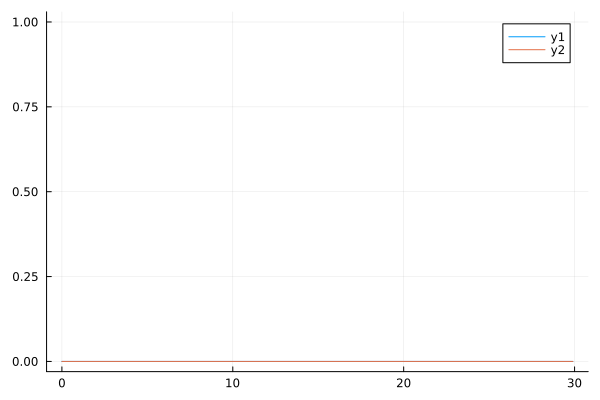

In [ ]:
plot(sneq_f[:,1], sneq_f[:,2])
plot!(sneq_f[:,1], sneq_f[:,3])
#plot!(sneq_f[:,1], sneq_f[:,4])

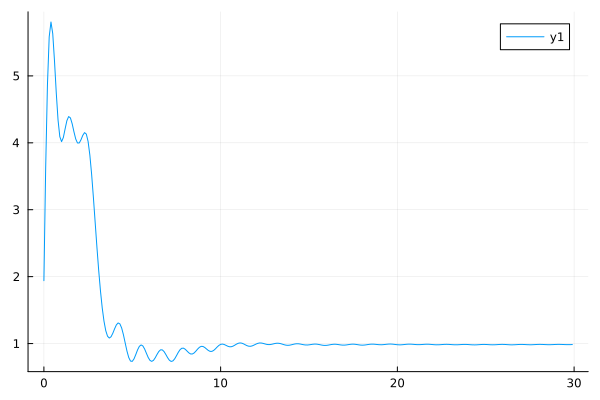

In [ ]:


#plot(cc_f[:,1], cc_f[:,2]) #Difference
#plot(cc_f[:,1], cc_f[:,3]) #Left
plot(cc_f[:,1], cc_f[:,4]) #Right


### Comparison with the code in fortran

In [ ]:
plot(data_chj_td[:,1],data_chj_td[:,2])
plot!(data_chj_td[:,1],data_chj_td[:,3])
plot!(data_chj_td[:,1],data_chj_td[:,4])

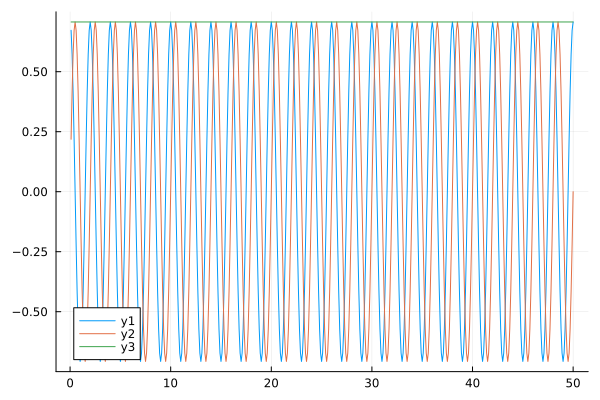

In [ ]:
plot(data_scl_td[:,1],data_scl_td[:,2])
plot!(data_scl_td[:,1],data_scl_td[:,3])
plot!(data_scl_td[:,1],data_scl_td[:,4])

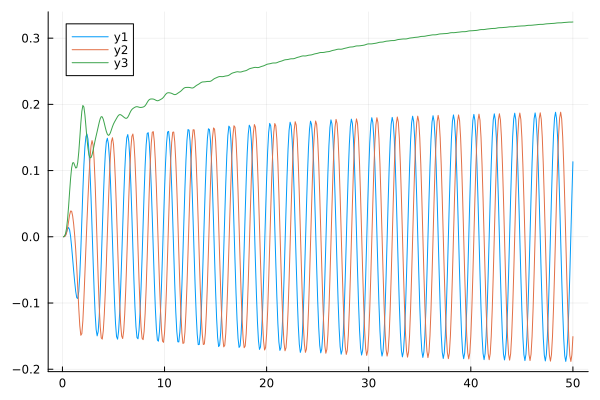

In [ ]:
plot(data_sne_td[:,1],[data_sne_td[:,2],data_sne_td[:,3],data_sne_td[:,4]] )

In [ ]:
plot(data_seq_td[:,1],data_seq_td[:,2])
plot!(data_seq_td[:,1],data_seq_td[:,3])
plot!(data_seq_td[:,1],data_seq_td[:,4])

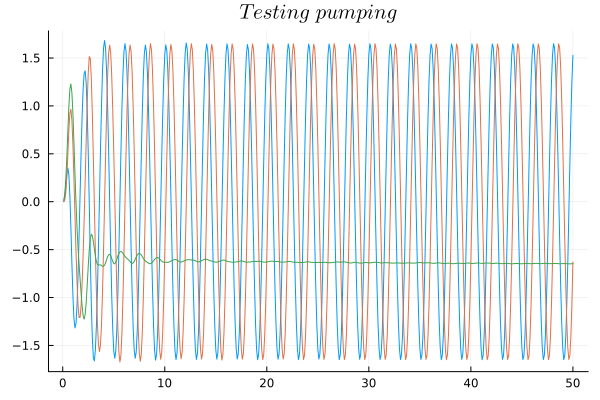

In [ ]:
#real(1im)
plot(data_spj_td[:,1], data_spj_td[:,3],labels = L"$I_x$",lw=1 ,title=L"$\rm{Testing \ pumping}$" )
plot!(data_spj_td[:,1], data_spj_td[:,5],labels = L"$I_y$",lw=1 )
plot!(data_spj_td[:,1], data_spj_td[:,7],labels=L"$I_z$",fontsize=25, lw=1,legend=false)
#plot!(sc_f[:,1], sc_f[:,4])
#plot!(data_spj_td[:,1], data_spj_td[:,6], ylim=[-0.1,0.1],xlim = [00,200],labels=L"$I_z$",fontsize=25, lw=3)
#,linewidth = 3, xrange = [0,20],fontsize=fs,color=["red" "blue" "orange"]
# xlabel!(L"$\rm{Time\  ( fs )}$")
# ylabel!(L"$\rm{Spin\ Current}$", thickness_scaling = 1.4)

### Continuos evolution

In [ ]:
function cont_evol(;t_0=t_0, t_step=t_step, t_end=t_end, llg_params = llg_parameters )
    ### Initiallize the parameters for LLG and electrons
    ### configuration and precession of spins
    rkvec = zeros(ComplexF64, size_rkvec)
    pr_spins = [PrecSpin(i) for i in 1:1:n_precessing  ]        ### array with mutables object of preccesin spins
    vm_a1x = [zeros(Float64,3) for _ in 1:n]                    ### array with vectors containiong the initial magnetization
    sm_eq_a1x = [zeros(Float64,3) for _ in 1:n] 
    diff = [zeros(Float64,3) for _ in 1:n]
    configure!(cspin_orientation,llg_params,vm_a1x,pr_spins)    ### set the initial values for pr_spins and vm_a1x
    H_ab = create_H(vm_a1x)                                     ### Initiallize the matrix with the density of the configuration
    ### Initial evaluation of spin density 
    params_0 = Dict( "sden" => true, "scurr"=>false
                    , "curr"=>false, "rho"=>false )
    # params_1= Dict( "sden" => true, "scurr"=>true
    #                 , "curr"=>true, "rho"=>false )
    sm_neq_a1x = Observables(rkvec,params_0 )["sden"]           ### Modify the global parameter rkvec
    ### Parameters of the system in equilibirum 
    poles_denis, res_denis = init_denis(mu = E_F_system,temp=Temp,e_min=-3.,p=21)
    ### For loop for the evolution of a single step
    sols_rkvec = []  #[rkvec] to save the first step        ### Solutions for the dynamical variables of electrons
    sols_vm_a1x = [] #[vm_a1x]                              ### Solutions for localized magnetic moments
    prob = ODEProblem(eom!,rkvec, (0.,t_end), H_ab )        ### defines the problem for the differentia equation 
    # scurrs = []
    # currs = []
    # sdens = []
    # cspins_f = open("cspins_jl.txt", "w+")
    # seq_f = open("seq_jl.txt", "w+")
    # rkvec_f = open("rkvec_jl.txt", "w+")
    #integrator =  init(prob,Vern7(), save_everystep=false,dt=t_step,adaptive=true,dense=false)#,reltol=1e-6,abstol=1e-6 )
    function affect!(integrator)
        #step!(integrator,t_step, true)                                ### evolve one time step  
        sm_neq_a1x .= Observables(integrator.u , params_0, false )["sden"]  ### update the spin density for electrons         
        # sm_eq_a1x .= spindensity_eq(vm_a1x,energy_llg; t = 1.0, Temp = Temp ) 
        # diff .= sm_neq_a1x .- sm_eq_a1x
        # ### Now the magnetization is computed at time t+dt
        # vm_a1x .= heun(vm_a1x, diff,t_step,llg_params)        ### magnetization at time t+dt
        # ### If there are precession spins alllocated, then it them
        for j in 1:1:n_precessing#length(pr_spins)
            update!(pr_spins[j], integrator.t  )
            vm_a1x[pr_spins[j].i ] .= pr_spins[j].s
        end   
        integrator.p = create_H(vm_a1x)#-1.5
    end
    condition(u, t, integrator) = t ∈ [t_0:t_step:t_end...]
    cb = DiscreteCallback(condition,affect!)#PresetTimeCallback([t_0:t_step:t_end...], affect!)
    integrator =  init(prob,Vern7(), save_everystep=true,dt=t_step,adaptive=true,dense=false,advance_to_tstop=true, callback = cb,tstops =[t_0:t_step:t_end...])#
    # elapsed_time = @elapsed begin
    #     sol = solve(prob, Tsit5(), callback = cb)
    # end
    ts = range(0, stop = 10, length = 100)
    for (u, t) in TimeChoiceIterator(integrator, ts)#tuples(integrator)
        @show vm_a1x, t
    end
    # close(seq_f)
    # close(cspins_f )
    # close(rkvec_f )
    #println("Total time of simulation: ", elapsed_time, " s" )
    #return currs,scurrs,sdens,sols_rkvec, sols_vm_a1x
    nothing
    return integrator#sol
end

#sol = cont_evol(t_step=0.1,t_end = 10)

cont_evol (generic function with 1 method)

In [ ]:
function save_observables_con(sol,params=params) 
    sneq_f = open("sneq_c_jl.txt", "w+")
    sc_f = open("sc_c_jl.txt", "w+")
    cc_f = open("cc_c_jl.txt", "w+")
    for t in [range(0,10,100)...]
        obs = Observables(sol.sol(t) , params, false )
        writedlm(sneq_f, transpose(vcat(t,obs["sden"]...) ), ' ' )
        writedlm(sc_f, transpose(vcat(t,obs["scurr"]...) ), ' ' )
        writedlm(cc_f, transpose(vcat(t,obs["curr"]...) ), ' ' )
    end
    close(sneq_f)
    close(sc_f)
    close(cc_f) 
end
#save_observables(sol) 

save_observables_con (generic function with 2 methods)

In [ ]:
# sneq_f = readdlm("sneq_c_jl.txt" , ' ')
# #seq_f = readdlm("seq_jl.txt" , ' ')
# sc_f = readdlm("sc_c_jl.txt" , ' ')
# cc_f = readdlm("cc_c_jl.txt" , ' ') ;

In [ ]:
# plot(sneq_f[:,1], sneq_f[:,2])
# plot!(sneq_f[:,1], sneq_f[:,3])
# plot!(sneq_f[:,1], sneq_f[:,4])

## Spin liquid addition

In [ ]:
using Pkg
using LinearAlgebra          ### Linear algebra library
using PyCall                 ### In case that quspin will be used
pushfirst!(PyVector(pyimport("sys")."path"), "./modules/") ### link to my own python modules 
Kf= pyimport("Kitaev_func")
np = pyimport("numpy")
quspin_tools_measurements = pyimport("quspin.tools.measurements")
ED_state_vs_time_f = quspin_tools_measurements.ED_state_vs_time
#py_list = pyimport("builtins").list
#Pkg.add("PyCall")
#Pkg.build("PyCall")
#Pkg.add("Conda")
#@pyimport quspin
# using Conda
# Conda.PYTHONDIR
# PyCall.libpython
### Example of code blocks in python 
# py"""
# import Kitaev_func as Kf
# import numpy as np
# """
# py"Kf.basis"

PyObject <function ED_state_vs_time at 0x7f2f519ec040>

In [ ]:
#### to debug the solver of eigen values
# #E_S, psi_S = Kf.Kitaev_H(alpha=pi, Js = [1.,1.,1.],J_coup = 0.0 ).eigh()
# E_S, psi_S = np.linalg.eig(Kf.Kitaev_H(alpha=pi, Js = [1.,1.,1.],J_coup = 0.0 ).toarray())
# #E_S, psi_S = Kf.Kitaev_H(alpha=pi, Js = [0.,0.,1.],J_coup = 0.0 ).eigsh(k=1,which="SA",maxiter=1E8)
# #Kf.Kitaev_H(alpha=pi, Js = [0.,0.,1.],J_coup = 0.0 ).eigh()#.eigsh(k=30,which="SA",maxiter=1E8)
# #eigen(Kf.Kitaev_H(alpha=pi, Js = [0.,1.,0.],J_coup = 0.0 ).toarray() ).vectors[:,1]
# #psi_S = eigen(Kf.Kitaev_H(alpha=pi, Js = [0.,1.,0.],J_coup = 0.0 ).toarray() ).vectors
# #np.linalg.eigh(Kf.Kitaev_H(alpha=pi, Js = [0.,1.,0.],J_coup = 0.0 ).toarray())
# ##.eigh()#.eigsh(k=1,which="SA",maxiter=1E4)#.eigh()#.eigsh(k = 1,which = "SA")#.eigh()#.eigsh(k = 1,which = "SA") #.eigh()#.eigsh(which = "SA")#
# psi_GS = psi_S[:,1] 
# #Kf.basis.ent_entropy(psi_GS ,sub_sys_A=A,alpha=1)["Sent_A"][1]
# A=[0,1,2,3,4]
# ssden = []
# for i in 0:9
#     S_z = Kf.spin_op_z(sites = i).expt_value(V = psi_GS)#.toarray()
#     S_x = Kf.spin_op_x(sites = i).expt_value(V = psi_GS)#.toarray()
#     S_y = Kf.spin_op_y(sites = i).expt_value(V = psi_GS)#.toarray()
#     #S_eq.append([np.real(S_x_v), np.real(S_y_v), np.real(S_z_v)])
#     push!(ssden, real([S_x,S_y,S_z]) )
#     println(real([S_x,S_y,S_z]))
# end
# #### Check if the GS is FM
# ennt= Kf.basis.ent_entropy(psi_GS ,sub_sys_A=A,alpha=1,density=true)["Sent_A"][1]
# println(ennt)
# #ssden

### Evolution of  the coupled code to the Spin-Liquid


In [ ]:
#set_initial_values!()              ### Modify the global parameters and set the initial values
const Eig_vals, Res_p = get_poles()
const Eig_vals_k2α = cat(Eig_vals,Eig_vals,dims=2)
const R_k2α = cat(Res_p,Res_p,dims=2) ;
const hi_αmk,hi_αmk1,hi_αmk2 = create_hi( Eig_vals_k2α = Eig_vals_k2α)
const Gam_greater_αmik, Gam_lesser_αmik = create_Gam(hi_αmk=hi_αmk
                                    ,hi_αmk1=hi_αmk1
                                    ,hi_αmk2=hi_αmk2,R_k2α=R_k2α)
const csi_aikα = create_csi() ;

In [ ]:
function evol_step_sl(;t_0=t_0, t_step=t_step, t_end=t_end, llg_params = llg_parameters,name="ferropumpT5J1",θ=pi )
    #θ=pi
    #### Initial values for the variables 
    rkvec = zeros(ComplexF64, size_rkvec)
    pr_spins = [PrecSpin(i) for i in 1:1:n_precessing  ]        ### array with mutables object of preccesin spins
    vm_a1x = [zeros(Float64,3) for _ in 1:n]                    ### array with vectors containiong the initial magnetization
    sm_eq_a1x = [zeros(Float64,3) for _ in 1:n] 
    diff = [zeros(Float64,3) for _ in 1:n]
    configure!(cspin_orientation,llg_params,vm_a1x,pr_spins)    ### set the initial values for pr_spins and vm_a1x
    H_ab = create_H(vm_a1x)                                     ### Initiallize the matrix with the density of the configuration
    delta_α = [0., 0.]
    ### Initial evaluation of spin density 
    params_0 = Dict( "sden" => true, "scurr"=>false
                    , "curr"=>false, "rho"=>false )
    params_1 = Dict( "sden" => true, "scurr"=>true
                    , "curr"=>true, "rho"=>false )
    sm_neq_a1x = Observables(rkvec,params_0 )["sden"]           ### Modify the global parameter rkvec
    ### Parameters of the system in equilibirum 
    poles_denis, res_denis = init_denis(mu = E_F_system,temp=Temp,e_min=-3.,p=21)
    ### Compute the Eigen values and the GS of the Kitaev model
    H_k = Kf.Kitaev_H(alpha=θ, Js = [1.,1.,1.],J_coup = J_qsl) ### the system is initially at heisenberg
    E_S, psi_S = np.linalg.eig(H_k.toarray())
    #H_k.eigh()#.eigsh(which = "SA")#.eigsh(k = 1,which = "SA") 
    psi_GS = psi_S[:,1] 
    #println(psi_GS)
    #psi_S[1,:] 
    if read_bias_file #& (i <= ti_bias)
        delta_α::Vector{Float64} .= data_bias[1,:]
    else
        delta_α .= [0. , 0.]
    end
    ### Seting ODE for electrons-bath
    prob = ODEProblem(eom!,rkvec, (0.0,t_end), [H_ab,delta_α] )         ### defines the problem for the differentia equation 
    integrator =  init(prob,Vern7(),dt=t_step, save_everystep=false,adaptive=true,dense=false)#,reltol=1e-12,abstol=1e-12)#,dt=t_step,reltol=1e-6,abstol=1e-6 )
    cspins_f = open("./data/cspins_$(name)_sl_jl.txt", "w+")
    seq_f = open("./data/seq_$(name)_sl_jl.txt", "w+")
    ###rkvec_f = open("./data/rkvec_$(name)_sl_jl.txt", "w+")
    ###rho_sl_f = open("./data/rho_$(name)_sl_jl.txt", "w+")
    #### New observables to be saved-------------------------
    entropy_f = open("./data/entropy_$(name)_sl_jl.txt", "w+")
    sden_sl_f = open("./data/sden_$(name)_sl_jl.txt", "w+")
    sneq_f = open("./data/sneq_$(name)_sl_jl.txt", "w+")
    sc_f = open("./data/sc_$(name)_sl_jl.txt", "w+")
    cc_f = open("./data/cc_$(name)_sl_jl.txt", "w+")
    ####-----------------------------------------------------
    
    elapsed_time = @elapsed begin
    ### Time evolution loop 
    for (i,t) in enumerate(t_0:t_step:(t_end-t_step) )
        ###inclusion of the bias 
        tt=round((i)*t_step,digits=2)
        println("time: ", tt  )
        flush(stdout)                                                          ### ensure that time_step is printed
        ### evolvution of the electron-bath 
        step!(integrator,t_step, true)                                
        ### Evolution of the Kitaev model 
        #psi_GS = vec(ED_state_vs_time_f(psi_GS, E_S,psi_S, np.array([0.1*hbar]) ) )#,iterate=False) hbar is because in the quspin svol hbar=1
        psi_GS = vec(Kf.evolve(H_static=H_k, H_dynamic=[], psi=psi_GS, dt=0.1, method= "CN", time_dep=0) )
        #### Evaluation of spin densities
        m_qsl = real(Kf.spindensity_qsl(psi=psi_GS,sites=[5,6,7])    )
        #### Note that this only returns 3 spin spin densities, then 
        ### we must acomodate the hilbert space in order to couple this to 
        ### the hilbert space of the electrons
        vm_qsl_a1x = [real(m_qsl[i, :]) for i in 1:3 :: Int]                 ### spin density of qsl
        pushfirst!(vm_qsl_a1x, [zeros(Float64,3) for _ in 1:3]... )              ### the fisrt 3 sites of the electron lattice is not coupled
        sm_neq_a1x .= Observables(integrator.u , params_0, false )["sden"]     ### update the spin density for electrons  
        sm_eq_a1x .= spindensity_eq(vm_a1x,energy_llg; t = 1.0, Temp = Temp )  ### spin density in eq
        ###diff .= sm_neq_a1x .- sm_eq_a1x
        ### Now the magnetization is computed at time t+dt
        ###vm_a1x .= heun(vm_a1x, diff,t_step,llg_params)        ### magnetization at time t+dt (This evolves with the difference)
        ### If there are precession spins alllocated, then it them
        # if tt < 50 
        #     for j in 1:1:n_precessing#length(pr_spins)
        #         update!(pr_spins[j], tt )
        #         vm_a1x[pr_spins[j].i ] .= pr_spins[j].s
        #     end    
        #     else
        #         vm_a1x = [zeros(Float64,3) for _ in 1:n] 
        # end
            #println("vm_cl: ",vm_a1x)
            #println("vm_sneq: ",sm_neq_a1x)
            #println("vm_qsl: ", vm_qsl_a1x  )
        ###vm_a1x = [zeros(Float64,3) for _ in 1:n] 
        if read_bias_file & (i <= ti_bias)
        delta_α::Vector{Float64} .= data_bias[i,:]
        #data_bias[1,:]
        else
            delta_α .= [0. , 0.]
        end
        integrator.p[1] .= create_H(vm_a1x,vm_qsl_a1x)  
        integrator.p[2] .=  delta_α#create_H(vm_a1x,vm_qsl_a1x) 
        ### The Kitaev hamiltonian is updated with the expected values of the electronic spins
        H_k = Kf.Kitaev_H(alpha=θ,S=hcat(sm_neq_a1x...), Js = [1.0,1.0,1.0],J_coup = J_qsl) #sm_neq_a1x
        ##E_S, psi_S = H_k.eigh() #.eigsh(which = "SA") 

        #### Calculation and storage of new observables 
        obs = Observables(integrator.u , params_1, false )#["sden"] 
        # Entropy 
        A=[0,5,6,1,7]#[0,1,2,3,4]
        ent = Kf.basis.ent_entropy(psi_GS ,sub_sys_A=A,alpha=1,density=true)["Sent_A"][1]
        writedlm(entropy_f, transpose(vcat(t, ent  ) ), ' ' )
        # Spin density
        sden = real(Kf.spindensity_qsl(psi=psi_GS,sites=[0,1,2,3,4,5,6,7,8,9]))
        writedlm(sden_sl_f, transpose(vcat(t, sden...) ), ' ' ) ;
        #spin density electrons
        writedlm(sneq_f, transpose(vcat(t,obs["sden"]...) ), ' ' )
        #spin current
        writedlm(sc_f, transpose(vcat(t,obs["scurr"]...) ), ' ' )
        #charge current 
        writedlm(cc_f, transpose(vcat(t,obs["curr"]...) ), ' ' )
            
        ####-----------------------------------------------
        
        writedlm(seq_f, transpose(vcat(tt,sm_eq_a1x...) ), ' ' )
        writedlm(cspins_f, transpose(vcat(tt,vm_a1x...) ), ' ' )
        ###writedlm(rkvec_f, transpose(vcat(tt,integrator.u) ), ',')
        ###writedlm(rho_sl_f, transpose(vcat(tt,psi_GS) ), ',')
    end
    end
    ####--------------
    close(entropy_f)
    close(sden_sl_f)
    close(sneq_f)
    close(sc_f)
    close(cc_f)
    ####-------------
    close(seq_f)
    close(cspins_f )
    ###close(rkvec_f )
    ###close(rho_sl_f)
    println("Total time of simulation: ", elapsed_time, " s" )
    nothing
end

#270/60

evol_step_sl (generic function with 1 method)

In [ ]:
#[zeros(Float64,3) for _ in 1:3]

In [ ]:
#testt= real([[0.,1*im,1.,], [0.,0.,1.] , [0.,0.,1.]]*0.1)


In [ ]:
#testt

In [ ]:
#name1 = "test"
#evol_step_sl(t_step=0.1,t_end = 0, name=name1,θ=pi )
# name1 = "ferropumpT5Jsd01J01t100"
# name2 = "aferropumpT5Jsd01J01t100"
# name3 = "slpumpT5Jsd01J01t100"

#name1 = "ferropulsesmBiasv002a30Jsd01J01Pol05t100"
#name2 = "aferropulsesmBiasv002a30Jsd01J01Pol05t100"
#name3 = "slpulsesmBiasv002a30Jsd01J01Pol05t100"


# name1 = "ferropulsesmBeamv002a100Jsd01J01Pol05t100"
# name2 = "aferropulsesmBeamv002a100Jsd01J01Pol05t100"
# name3 = "slpulsesmBeamv002a100Jsd01J01Pol05t100"

name1 = "ferropulsesmLevitonvr002a100Jsd1J01Pol1t200"
name2 = "aferropulsesmLevitonvr002a100Jsd1J01Pol1t200"
name3 = "slpulsesmLevitonvr002a100Jsd01J1Pol1t200"


"slpulsesmLevitonvr002a100Jsd01J1Pol1t200"

In [ ]:
evol_step_sl(t_step=0.1,t_end = 200, name=name1,θ=pi )

time: 0.1
time: 0.2
time: 0.3
time: 0.4
time: 0.5
time: 0.6
time: 0.7
time: 0.8
time: 0.9
time: 1.0
time: 1.1
time: 1.2
time: 1.3
time: 1.4
time: 1.5
time: 1.6
time: 1.7
time: 1.8
time: 1.9
time: 2.0
time: 2.1
time: 2.2
time: 2.3
time: 2.4
time: 2.5
time: 2.6
time: 2.7
time: 2.8
time: 2.9
time: 3.0
time: 3.1
time: 3.2
time: 3.3
time: 3.4
time: 3.5
time: 3.6
time: 3.7
time: 3.8
time: 3.9
time: 4.0
time: 4.1
time: 4.2
time: 4.3
time: 4.4
time: 4.5
time: 4.6
time: 4.7
time: 4.8
time: 4.9
time: 5.0
time: 5.1
time: 5.2
time: 5.3
time: 5.4
time: 5.5
time: 5.6
time: 5.7
time: 5.8
time: 5.9
time: 6.0
time: 6.1
time: 6.2
time: 6.3
time: 6.4
time: 6.5
time: 6.6
time: 6.7
time: 6.8
time: 6.9
time: 7.0
time: 7.1
time: 7.2
time: 7.3
time: 7.4
time: 7.5
time: 7.6
time: 7.7
time: 7.8
time: 7.9
time: 8.0
time: 8.1
time: 8.2
time: 8.3
time: 8.4
time: 8.5
time: 8.6
time: 8.7
time: 8.8
time: 8.9
time: 9.0
time: 9.1
time: 9.2
time: 9.3
time: 9.4
time: 9.5
time: 9.6
time: 9.7
time: 9.8
time: 9.9
time: 10.0

In [ ]:
evol_step_sl(t_step=0.1,t_end = 200, name=name2,θ=0 )

time: 0.1
time: 0.2
time: 0.3
time: 0.4
time: 0.5
time: 0.6
time: 0.7
time: 0.8
time: 0.9
time: 1.0
time: 1.1
time: 1.2
time: 1.3
time: 1.4
time: 1.5
time: 1.6
time: 1.7
time: 1.8
time: 1.9
time: 2.0
time: 2.1
time: 2.2
time: 2.3
time: 2.4
time: 2.5
time: 2.6
time: 2.7
time: 2.8
time: 2.9
time: 3.0
time: 3.1
time: 3.2
time: 3.3
time: 3.4
time: 3.5
time: 3.6
time: 3.7
time: 3.8
time: 3.9
time: 4.0
time: 4.1
time: 4.2
time: 4.3
time: 4.4
time: 4.5
time: 4.6
time: 4.7
time: 4.8
time: 4.9
time: 5.0
time: 5.1
time: 5.2
time: 5.3
time: 5.4
time: 5.5
time: 5.6
time: 5.7
time: 5.8
time: 5.9
time: 6.0
time: 6.1
time: 6.2
time: 6.3
time: 6.4
time: 6.5
time: 6.6
time: 6.7
time: 6.8
time: 6.9
time: 7.0
time: 7.1
time: 7.2
time: 7.3
time: 7.4
time: 7.5
time: 7.6
time: 7.7
time: 7.8
time: 7.9
time: 8.0
time: 8.1
time: 8.2
time: 8.3
time: 8.4
time: 8.5
time: 8.6
time: 8.7
time: 8.8
time: 8.9
time: 9.0
time: 9.1
time: 9.2
time: 9.3
time: 9.4
time: 9.5
time: 9.6
time: 9.7
time: 9.8
time: 9.9
time: 10.0

In [ ]:
evol_step_sl(t_step=0.1,t_end = 200, name=name3,θ=3pi/2 )

time: 0.1
time: 0.2
time: 0.3
time: 0.4
time: 0.5
time: 0.6
time: 0.7
time: 0.8
time: 0.9
time: 1.0
time: 1.1
time: 1.2
time: 1.3
time: 1.4
time: 1.5
time: 1.6
time: 1.7
time: 1.8
time: 1.9
time: 2.0
time: 2.1
time: 2.2
time: 2.3
time: 2.4
time: 2.5
time: 2.6
time: 2.7
time: 2.8
time: 2.9
time: 3.0
time: 3.1
time: 3.2
time: 3.3
time: 3.4
time: 3.5
time: 3.6
time: 3.7
time: 3.8
time: 3.9
time: 4.0
time: 4.1
time: 4.2
time: 4.3
time: 4.4
time: 4.5
time: 4.6
time: 4.7
time: 4.8
time: 4.9
time: 5.0
time: 5.1
time: 5.2
time: 5.3
time: 5.4
time: 5.5
time: 5.6
time: 5.7
time: 5.8
time: 5.9
time: 6.0
time: 6.1
time: 6.2
time: 6.3
time: 6.4
time: 6.5
time: 6.6
time: 6.7
time: 6.8
time: 6.9
time: 7.0
time: 7.1
time: 7.2
time: 7.3
time: 7.4
time: 7.5
time: 7.6
time: 7.7
time: 7.8
time: 7.9
time: 8.0
time: 8.1
time: 8.2
time: 8.3
time: 8.4
time: 8.5
time: 8.6
time: 8.7
time: 8.8
time: 8.9
time: 9.0
time: 9.1
time: 9.2
time: 9.3
time: 9.4
time: 9.5
time: 9.6
time: 9.7
time: 9.8
time: 9.9
time: 10.0

In [ ]:
# name1 = "ferropumpT5J05t100"
# name3= "slpumpT5J05t100"
# name2 = "aferropumpT5J05t100"


In [ ]:
function save_observables_sl(;name="ferropumpT5J1")# rho_sl,)
    rho_sl_f = readdlm("./data/rho_$(name)_sl_jl.txt", ',' ,Complex{Float64} ) ;
    alpha=1.       ### 1 for von-neuman entropy or 0 shannon entropy
    A=[0,5,6,1,7]#[0,1,2,3,4]
    times = real(rho_sl_f[:,1]) 
    entropy_f = open("./data/entropy_$(name)_sl_jl.txt", "w+")
    sden_sl_f = open("./data/sden_$(name)_sl_jl.txt", "w+")
    for (j,t) in enumerate(times)
        ent = Kf.basis.ent_entropy(rho_sl_f[j,2:end] ,sub_sys_A=A,alpha=1,density=true)["Sent_A"][1]
        #println(ent)
        sden = []
        for i in 0:9
            S_z = Kf.spin_op_z(sites = i).expt_value(V = rho_sl_f[j,2:end])#.toarray()
            S_x = Kf.spin_op_x(sites = i).expt_value(V = rho_sl_f[j,2:end])#.toarray()
            S_y = Kf.spin_op_y(sites = i).expt_value(V = rho_sl_f[j,2:end])#.toarray()
            push!(sden, real([S_x,S_y,S_z]) )
        end
        writedlm(entropy_f, transpose(vcat(t, ent  ) ), ' ' )
        writedlm(sden_sl_f, transpose(vcat(t, sden...) ), ' ' ) ;
    end
    close(entropy_f)
    close(sden_sl_f)
end


save_observables_sl (generic function with 1 method)

In [ ]:
save_observables_sl(name=name1)  #, 

In [ ]:
save_observables_sl(name=name2)

In [ ]:
save_observables_sl(name=name3)

In [ ]:
#name1 = "ferropumpT5J1t100"
#name1 = "slpumpT5J1t100"
#name3 = "aferropumpT5J1t100" ;

In [ ]:
cspins_f = readdlm("./data/cspins_$(name1)_sl_jl.txt" , ' ')
seq_f = readdlm("./data/seq_$(name1)_sl_jl.txt" , ' ') ;
#rkvec_f = readdlm("./data/rkvec_$(name1)_sl_jl.txt", ',' ,Complex{Float64} ) ;
#rho_sl_f = readdlm("./data/rho_$(name1)_sl_jl.txt", ',' ,Complex{Float64} ) ;


In [ ]:
ent_f = readdlm("./data/entropy_$(name1)_sl_jl.txt" , ' ')
sden_sl_f = readdlm("./data/sden_$(name1)_sl_jl.txt" , ' ') ;

In [ ]:
#sden_sl_f[:,2]

1000-element Vector{Float64}:
 -9.595239733542095e-37
 -3.16462923624758e-36
  1.530843005412786e-35
  1.0255673634420287e-34
  2.553986010205833e-34
  3.2532990723276086e-34
  6.6925741500234e-35
 -6.3325616744427494e-34
 -1.5448391368175913e-33
 -2.1570580322250342e-33
 -2.036852089655099e-33
 -1.190058393783105e-33
 -9.325971776692241e-35
  ⋮
  2.317217847444241e-34
 -3.7175712792347832e-34
 -5.347282272988269e-34
 -2.991537049759374e-34
 -2.96814867795053e-35
 -9.043913961923255e-35
 -5.302113508341497e-34
 -1.0660726643515684e-33
 -1.3579709704696092e-33
 -1.2889867537902713e-33
 -9.97276965500618e-34
 -6.849813030901653e-34

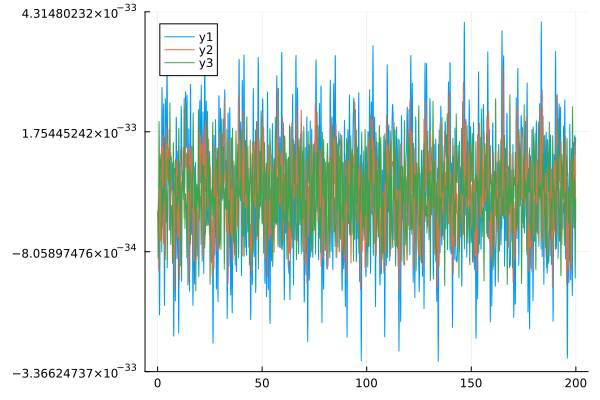

In [ ]:
plot(sden_sl_f[:,1], sden_sl_f[:,2])
plot!(sden_sl_f[:,1], sden_sl_f[:,3])
plot!(sden_sl_f[:,1], sden_sl_f[:,4])



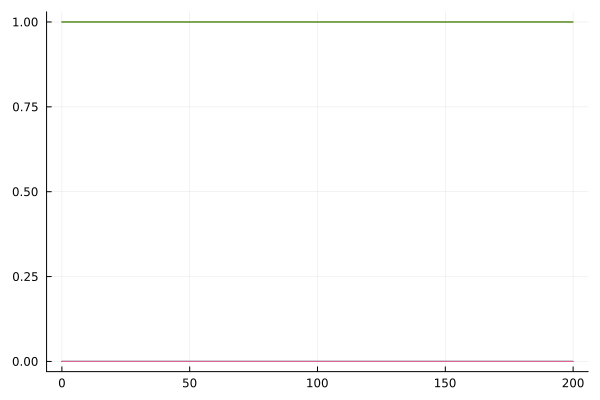

In [ ]:
sx_sden_pos = [sden_sl_f[:,i] for i in 2:3:31]
plot(sden_sl_f[:,1],sx_sden_pos )
plot!(legend=false)

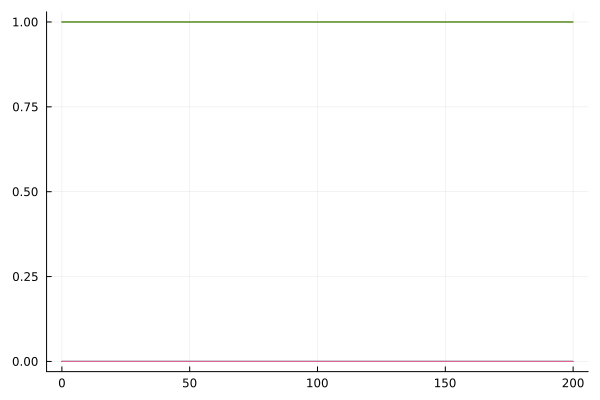

In [ ]:
sy_sden_pos = [sden_sl_f[:,i] for i in 3:3:31]
plot(sden_sl_f[:,1],sy_sden_pos )
plot!(legend=false)

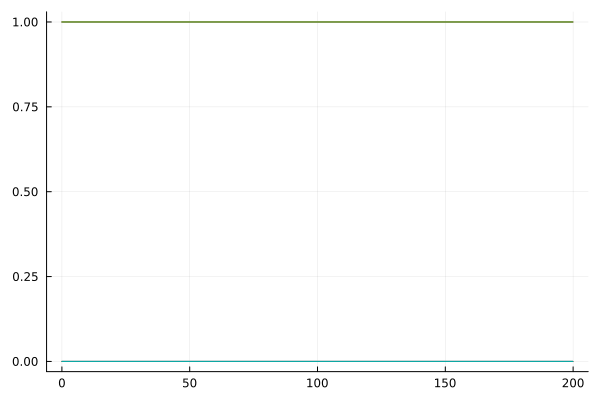

In [ ]:
sz_sden_pos = [sden_sl_f[:,i] for i in 4:3:31]
plot(sden_sl_f[:,1],sz_sden_pos )
plot!(legend=false)


In [ ]:
sz_sden_pos

10-element Vector{Vector{Float64}}:
 [1.0822328355879299e-35, -1.0556939049040657e-34, -5.121929371905744e-34, -9.513367386849329e-34, -8.447130848891218e-34, 6.477154778833043e-35, 1.288162359888295e-33, 1.9731696243094697e-33, 1.7353905456327113e-33, 1.0123985173063276e-33  …  -3.001523893200583e-34, -2.4370506984507625e-34, 2.4004389811790895e-34, 7.528080044370111e-34, 6.6798590958934555e-34, -1.608921622328557e-34, -1.115339775032766e-33, -1.3668738405394642e-33, -6.975537121057738e-34, 3.2386762993652407e-34]
 [1.716404081458009e-36, 1.6268550713935714e-35, 3.671997054067132e-35, 2.318682061402746e-36, -1.4407956168885805e-34, -3.4533115364950732e-34, -4.261268695382791e-34, -2.628056063557238e-34, 3.1059106368038947e-35, 1.3713176928867875e-34  …  1.0869753334425957e-33, 1.4261336774201298e-33, 1.349462579459624e-33, 1.026851226430899e-33, 7.819068456058708e-34, 8.075376386480025e-34, 1.024699301305309e-33, 1.2167610981298863e-33, 1.2777862815686314e-33, 1.302049720959159e-33]
 

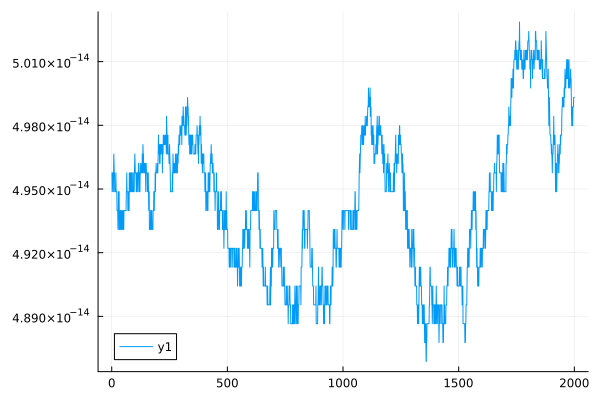

In [ ]:
plot(ent_f[:,2])

In [ ]:
# name1 = "ferropumpT5J1"
#name2 = "slpumpT5J1"
# name3 = "aferropumpT5J1"
#name1


In [ ]:
function save_observables(params=params;name = name1)#rkvec_f)
    """ Using the rkvec data build the needed obervables
    """
    rkvec_f = readdlm("./data/rkvec_$(name)_sl_jl.txt", ',' ,Complex{Float64} ) ;
    times = real(rkvec_f[:,1]) 
    sneq_f = open("./data/sneq_$(name)_sl_jl.txt", "w+")
    sc_f = open("./data/sc_$(name)_sl_jl.txt", "w+")
    cc_f = open("./data/cc_$(name)_sl_jl.txt", "w+")
    for (j,t) in enumerate(times ) #times
        obs = Observables(rkvec_f[j,2:end] , params, false )
        writedlm(sneq_f, transpose(vcat(t,obs["sden"]...) ), ' ' )
        writedlm(sc_f, transpose(vcat(t,obs["scurr"]...) ), ' ' )
        writedlm(cc_f, transpose(vcat(t,obs["curr"]...) ), ' ' )
    end
    close(sneq_f)
    close(sc_f)
    close(cc_f) 
end
#save_observables(rkvec_f)



save_observables (generic function with 2 methods)

In [ ]:
save_observables(name = name1)

In [ ]:
save_observables(name = name2)

In [ ]:
save_observables(name = name3)   ############### last guy i leave runing 

In [ ]:
name2 = "aferropulsesmBiasv04a30Jsd01J01t100" ######

In [ ]:
name1 = "test"

sneq_f = readdlm("./data/sneq_$(name1)_jl.txt" , ' ')
seq_f = readdlm("./data/seq_$(name1)_jl.txt" , ' ')
sc_f = readdlm("./data/sc_$(name1)_jl.txt" , ' ')
cc_f = readdlm("./data/cc_$(name1)_jl.txt" , ' ') ;

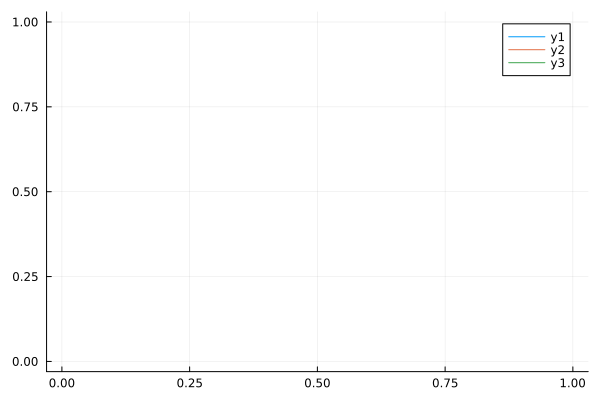

In [ ]:
#sneq_f
plot(sneq_f[:,1], sneq_f[:,2])
plot!(sneq_f[:,1], sneq_f[:,3])
plot!(sneq_f[:,1], sneq_f[:,4])

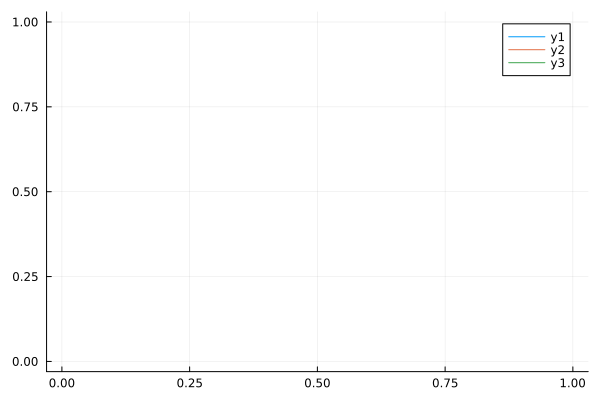

In [ ]:
plot(sneq_f[:,1], sneq_f[:,2])
plot!(sneq_f[:,1], sneq_f[:,3])
plot!(sneq_f[:,1], sneq_f[:,4])

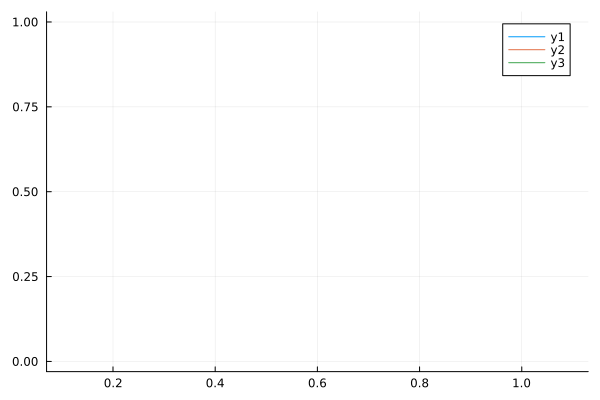

In [ ]:
plot(seq_f[:,1], seq_f[:,2])
plot!(seq_f[:,1], seq_f[:,3])
plot!(seq_f[:,1], seq_f[:,4])

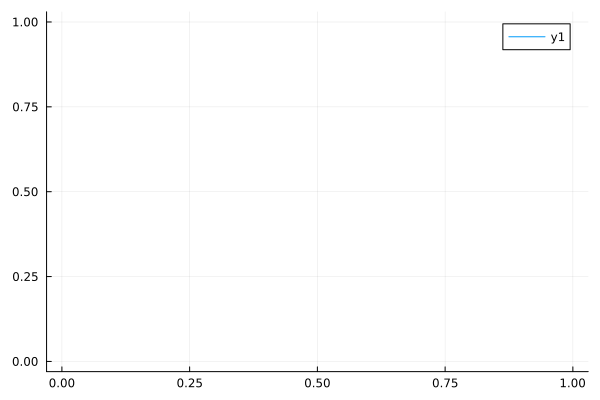

In [ ]:
plot(cc_f[:,1], cc_f[:,2])
#plot!(cc_f[:,1], cc_f[:,3])
#plot!(cc_f[:,1], cc_f[:,4])

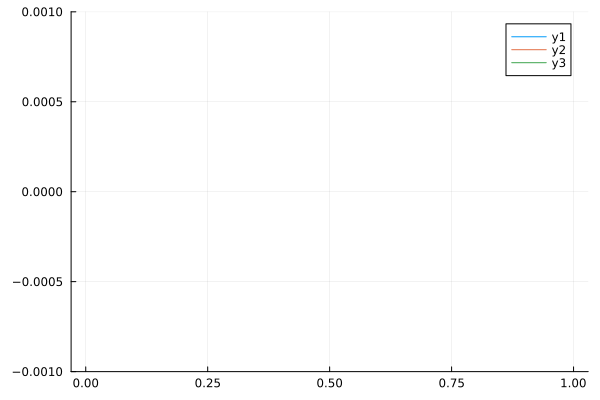

In [ ]:
plot(sc_f[:,1], sc_f[:,2])
plot!(sc_f[:,1], sc_f[:,3])
plot!(sc_f[:,1], sc_f[:,4],ylim=[-1e-3,1e-3])



In [ ]:
J_qsl

1.5

## Testing the dynamics 

### Anilytical spin current 

In [ ]:
# omega = 2*pi/period

# function spin_curr(;ϵ_I=0.,E_f = 2. , γ = 1., θ = 10*pi/180., ω=20*2*pi, Δ = 3.)
#     ħ=1/(2*pi)
#     Σ = E_f - 2*γ - sqrt(complex(  (E_f-2*γ)^2-4*γ^2   ))
#     R = (4*Σ^2-Δ^2)*(Σ-ϵ_I)^2/4 + (4*ϵ_I*Σ - 4*Σ^2)*γ^2/2 + γ^4
#     J_z = ħ*ω*sin(θ) * γ*Δ*Σ.im^2/(8*pi*norm(R)^2)*(4*(γ^2+ϵ_I^2) + 4*norm(Σ)^2 - 8*ϵ_I*Σ.re )

# end
# energies = 0:0.1:6
# plot(energies,spin_curr.(ϵ_I=energies), yrange=[0, 1e-1]  )
# ylabel!("Spin Current")
# xlabel!("Barrier height ")
#spin_curr()

### Testing LLG

#### Initial conditions 

In [ ]:
# m_0 = [[1.,0.,0.]]#zeros((n_sites,3))
# s_0 = [[0.,0.,0.]] ;
s_0 = [[0.,0.,0.],[0.0,0.0,0.0],[0.,0.0,0.]] 
m_0 = [[1.,0.,0.],[1.0,0.0,0.0],[1.,0.0,0.]] ;

#### Evolution

In [ ]:
function evolution_test(m_0=m_0,t_0=t_0,t_step=t_step,t_end=t_end,llg_params=llg_parameters )
    m_t = copy(m_0)
    sols = [m_t]
    time_run= @elapsed begin
        for ti in t_0:t_step:t_end
            m_t = heun(m_t,s_0,t_step,llg_params)
            push!(sols, m_t)
            println("time: ", round(ti,digits=3) )
        end
    end
    println("Simulation time: ", time_run, "s")
    return sols
end

evolution_test (generic function with 6 methods)

In [ ]:
##sols= evolution_test() ;

In [ ]:
m_x=[sols[i][1][1] for i in 1:length(sols) ] # Time, position, component
m_y=[sols[i][1][2] for i in 1:length(sols) ] # Time, position, component
m_z=[sols[i][1][3] for i in 1:length(sols) ]; # Time, position, component

#### Numerical vs analitycal solution

##### Analitycal solution


In [ ]:
times_test = t_0:t_step:t_end
H = norm(h0)
omega_0 = GAMMA_R*H/(1+g_lambda^2)
damp = omega_0*g_lambda
mx_test = 1 ./cosh.(damp*times_test).*cos.(omega_0*times_test)
my_test = 1 ./cosh.(damp*times_test).*sin.(omega_0*times_test)
mz_test = tanh.(damp*times_test) ;

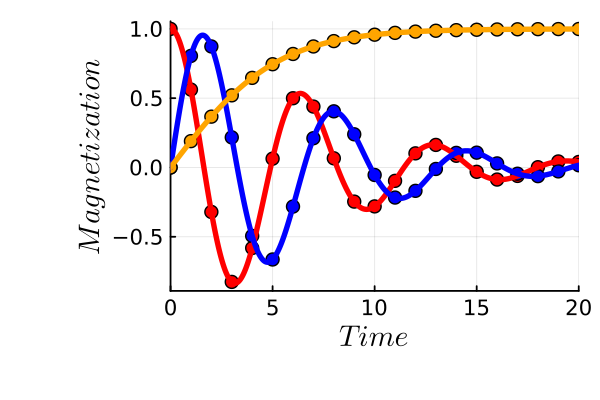

In [ ]:
### Comparison 
fs=300 # fontsize
ts= 1.8
scatter(times_test[1:100:end],[m_x[1:100:end] ,m_y[1:100:end] , m_z[1:100:end] ], lw= 10,color=["red" "blue" "orange"],fontsize=fs  )
plot!(legend=false)
plot!( times_test ,[mx_test,my_test,mz_test],labels=[L"$m_x$" L"$m_y$" L"$m_z$" ],linewidth = 3, xrange = [0,20],fontsize=fs,color=["red" "blue" "orange"] )
xlabel!(L"$\rm{Time}$",fontsize=fs)
ylabel!(L"$\rm{Magnetization}$",fontsize=fs, thickness_scaling = ts)
#xrange!(0,30)
#??plot()